In [27]:
%pip install plotly

                                              0.0/9.8 MB ? eta -:--:--
                                              0.0/9.8 MB ? eta -:--:--
                                              0.1/9.8 MB 1.3 MB/s eta 0:00:08
                                              0.2/9.8 MB 1.8 MB/s eta 0:00:06
     -                                        0.3/9.8 MB 2.1 MB/s eta 0:00:05
     -                                        0.5/9.8 MB 2.4 MB/s eta 0:00:04
     --                                       0.7/9.8 MB 2.6 MB/s eta 0:00:04
     ---                                      0.8/9.8 MB 2.7 MB/s eta 0:00:04
     ---                                      1.0/9.8 MB 2.8 MB/s eta 0:00:04
     ----                                     1.1/9.8 MB 2.8 MB/s eta 0:00:04
     -----                                    1.3/9.8 MB 3.0 MB/s eta 0:00:03
     ------                                   1.5/9.8 MB 3.0 MB/s eta 0:00:03
     ------                                   1.7/9.8 MB 3.1 MB/s eta 0:00:03



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
%pip install textblob

                                              0.0/624.3 kB ? eta -:--:--
                                              10.2/624.3 kB ? eta -:--:--
                                              10.2/624.3 kB ? eta -:--:--
                                              10.2/624.3 kB ? eta -:--:--
                                              10.2/624.3 kB ? eta -:--:--
     -                                      20.5/624.3 kB 54.8 kB/s eta 0:00:12
     -                                      30.7/624.3 kB 87.5 kB/s eta 0:00:07
     -                                      30.7/624.3 kB 87.5 kB/s eta 0:00:07
     -                                      30.7/624.3 kB 87.5 kB/s eta 0:00:07
     --                                     41.0/624.3 kB 81.9 kB/s eta 0:00:08
     ---                                   61.4/624.3 kB 121.3 kB/s eta 0:00:05
     ----                                  71.7/624.3 kB 135.6 kB/s eta 0:00:05
     ----                                  71.7/624.3 kB 135.6 kB/s eta


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Step 1 :  Explanatory Data Analysis and Feature Engineering 

In [ ]:
# Suppress warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# Core Python libraries for data handling and utilities
import pandas as pd            # For data manipulation and analysis
import numpy as np             # For numerical computations
import re                      # For regular expressions (text cleaning)
import string                  # For handling punctuation and string operations
import time                    # For working with time (e.g., timestamps)
from collections import Counter # For counting elements efficiently
from typing import List, Dict, Tuple, Any  # For type hinting (optional, improves code readability)

# Visualization libraries for plotting graphs
import matplotlib.pyplot as plt     # Core plotting library
import seaborn as sns               # High-level plotting library built on top of matplotlib
from wordcloud import WordCloud     # For generating word clouds
import plotly.graph_objects as go   # For creating complex interactive plots
import plotly.express as px         # For quick and easy interactive plots
from plotly.subplots import make_subplots  # For combining multiple plots into one figure

# Natural Language Processing (NLP) libraries
import nltk                                       # Main NLP library
from nltk.corpus import stopwords                 # For removing common words (like 'the', 'is')
from nltk.tokenize import word_tokenize           # For splitting text into words
from nltk.stem import WordNetLemmatizer, PorterStemmer  # For reducing words to their root forms
from textblob import TextBlob                     # For sentiment analysis and simple text processing

# Machine learning tools
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold  # Data splitting & validation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer            # For text vectorization
from sklearn.preprocessing import LabelEncoder                                          # For encoding categorical labels

# Machine learning models
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier     # Linear models
from sklearn.naive_bayes import MultinomialNB, ComplementNB                             # Naive Bayes models
from sklearn.svm import LinearSVC                                                       # Support Vector Machine model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier          # Ensemble models
from sklearn.ensemble import VotingClassifier, StackingClassifier                       # Combined model techniques

# Evaluation metrics for model performance
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,  # Basic evaluation tools
    precision_score, recall_score, f1_score, roc_auc_score,   # Classification metrics
    matthews_corrcoef, cohen_kappa_score, hamming_loss,       # Advanced performance measures
    balanced_accuracy_score, log_loss                         # Other useful metrics
)

# Handle imbalanced datasets (equalize class distribution)
from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique

# Print decorative title and status message
print("  CONSUMER COMPLAINT TEXT CLASSIFICATION")
print("\n All libraries imported successfully!")

# Print current system timestamp
print(f" Timestamp: {time.strftime('%Y-%m-%d %H:%M:%S')}")

# Download essential NLTK resources used in preprocessing
print("\n[Downloading NLTK Resources...]")
nltk_resources = ['punkt', 'stopwords', 'wordnet', 'averaged_perceptron_tagger', 'omw-1.4']
for resource in nltk_resources:
    try:
        nltk.download(resource, quiet=True)    # Download resource silently
        print(f" {resource}")                  # Print confirmation
    except:
        print(f" {resource} - already exists") # Handle already-downloaded cases

# Set default visualization style for plots
plt.style.use('seaborn-v0_8-darkgrid')  # Apply seaborn-style grid theme
sns.set_palette("husl")                 # Set a colorful palette for Seaborn plots

# Set random seed for reproducibility (same results every run)
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Create output directory to store results, plots, and models
import os
OUTPUT_DIR = 'complaint_classification_outputs'  # Folder name
os.makedirs(OUTPUT_DIR, exist_ok=True)           # Create folder if it doesn't exist
print(f"\n Output directory created: {OUTPUT_DIR}")


  CONSUMER COMPLAINT TEXT CLASSIFICATION

 All libraries imported successfully!
 Timestamp: 2025-10-19 23:16:00

[Downloading NLTK Resources...]
 punkt
 stopwords
 wordnet
 averaged_perceptron_tagger
 omw-1.4

 Output directory created: complaint_classification_outputs/


In [43]:
# Display section header
print("DATA LOADING & INITIAL EXPLORATION")


# Define a function to load and prepare the dataset
def load_and_prepare_data(sample_size: int = 10000) -> pd.DataFrame:
    """
    Load and prepare consumer complaint dataset.
    
    Args:
        sample_size: Number of samples to load (use None for full dataset)
    
    Returns:
        Prepared DataFrame
    """
    # Step 1: Show progress
    print("\n[Loading Dataset...]")
    
    # Step 2: Inform user that a synthetic dataset is being created (for demo)
    print("Creating synthetic dataset for demonstration...")
    print("  Replace with: df = pd.read_csv('Consumer_Complaints.csv')")

    # Step 3: Define categories (numeric label mapped to category name)
    categories = {
        0: 'Credit reporting, repair, or other',
        1: 'Debt collection',
        2: 'Consumer Loan',
        3: 'Mortgage'
    }

    # Step 4: Create example complaint text templates for each category
    complaints_templates = {
        0: [  # Credit reporting issues
            "Error in credit report needs correction immediately",
            "Incorrect information on my credit file",
            "Credit bureau reporting wrong data about my account",
            "Dispute credit report inaccuracies",
            "Credit repair company scam"
        ],
        1: [  # Debt collection issues
            "Debt collector calling at inappropriate times",
            "Harassing calls from collection agency",
            "Collector threatened legal action unfairly",
            "Debt validation request ignored",
            "Collection agency violating FDCPA"
        ],
        2: [  # Consumer loan issues
            "Personal loan payment processing issue",
            "Unfair interest rate on consumer loan",
            "Loan servicer not applying payments correctly",
            "Auto loan payment dispute",
            "Student loan repayment problem"
        ],
        3: [  # Mortgage issues
            "Mortgage servicer foreclosure error",
            "Home loan modification denied unfairly",
            "Mortgage escrow account discrepancy",
            "Refinance application issues",
            "Mortgage payment not credited properly"
        ]
    }

    # Step 5: Generate synthetic data based on templates
    data = []
    for category, templates in complaints_templates.items():  # Loop through each complaint type
        for _ in range(sample_size // 4):  # Equal number of samples per category
            template = np.random.choice(templates)  # Pick a random complaint sentence
            
            # Add random variation at the end to make each complaint unique
            complaint = template + " " + np.random.choice([
                "This has caused significant stress.",
                "I need immediate resolution.",
                "Please investigate this matter.",
                "This is unacceptable service.",
                "I am very dissatisfied with the response."
            ])
            
            # Append a dictionary representing one record (row)
            data.append({
                'Consumer complaint narrative': complaint,  # Complaint text
                'Product': categories[category],             # Product name
                'label': category                            # Numerical label
            })

    # Step 6: Convert list of dictionaries into a pandas DataFrame
    df = pd.DataFrame(data)

    # Step 7: Shuffle rows for randomness and reset index
    df = df.sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)

    # Step 8: Print confirmation message
    print(f" Dataset loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")

    # Step 9: Return the prepared DataFrame
    return df


# Load the synthetic dataset using the defined function
df = load_and_prepare_data(sample_size=10000)

# Display overview of the dataset
print(f"\n[Dataset Overview]")

# Show number of rows and columns
print(f"Shape: {df.shape}")

# Show column names
print(f"\nColumns: {list(df.columns)}")

# Show first 3 rows of the DataFrame
print(f"\nFirst 3 rows:")
print(df.head(3))

# Show data types of each column
print(f"\nData types:")
print(df.dtypes)

# Check for any missing (NaN) values in each column
print(f"\nMissing values:")
print(df.isnull().sum())

# Display class label distribution (how many samples per category)
print(f"\nClass distribution:")
print(df['label'].value_counts().sort_index())


DATA LOADING & INITIAL EXPLORATION

[Loading Dataset...]
Creating synthetic dataset for demonstration...
  Replace with: df = pd.read_csv('Consumer_Complaints.csv')
 Dataset loaded: 10,000 rows × 3 columns

[Dataset Overview]
Shape: (10000, 3)

Columns: ['Consumer complaint narrative', 'Product', 'label']

First 3 rows:
                        Consumer complaint narrative                             Product  label
0  Student loan repayment problem I am very dissa...                       Consumer Loan      2
1  Debt validation request ignored I am very diss...                     Debt collection      1
2  Error in credit report needs correction immedi...  Credit reporting, repair, or other      0

Data types:
Consumer complaint narrative    object
Product                         object
label                            int64
dtype: object

Missing values:
Consumer complaint narrative    0
Product                         0
label                           0
dtype: int64

Class distributio

EXPLORATORY DATA ANALYSIS

[1/7] Class Distribution Analysis...


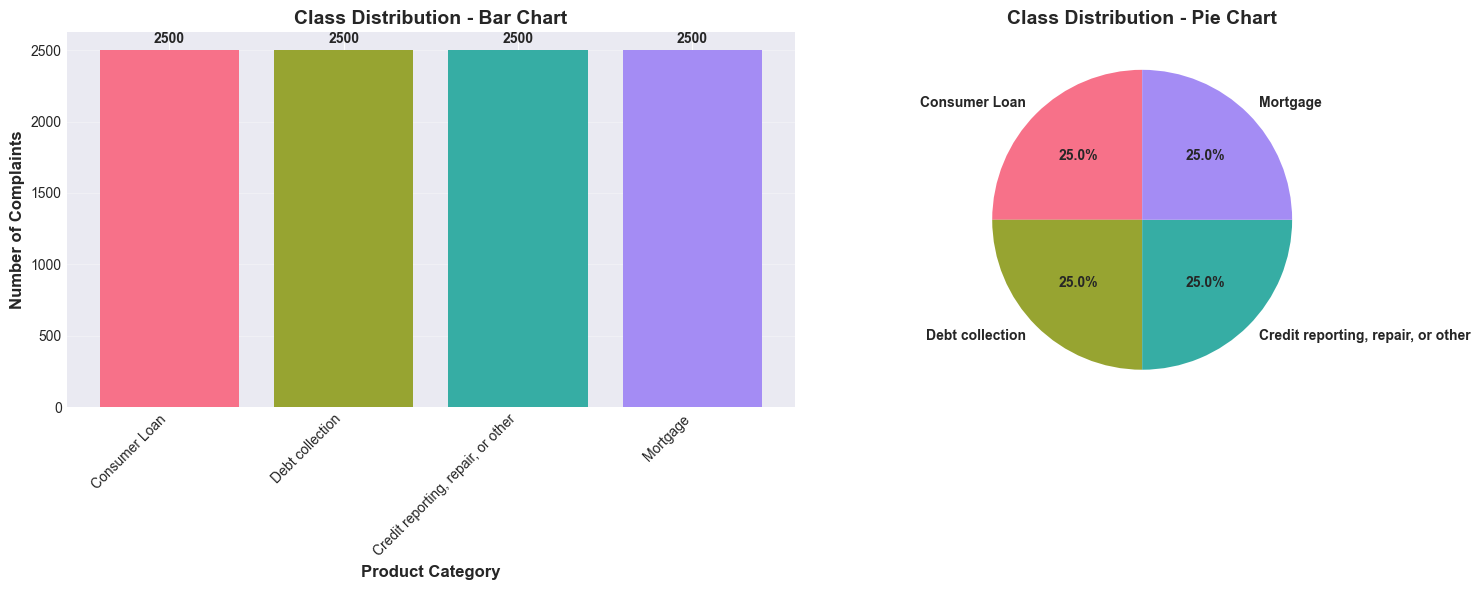

Class distribution visualized

[2/7] Text Length Analysis...


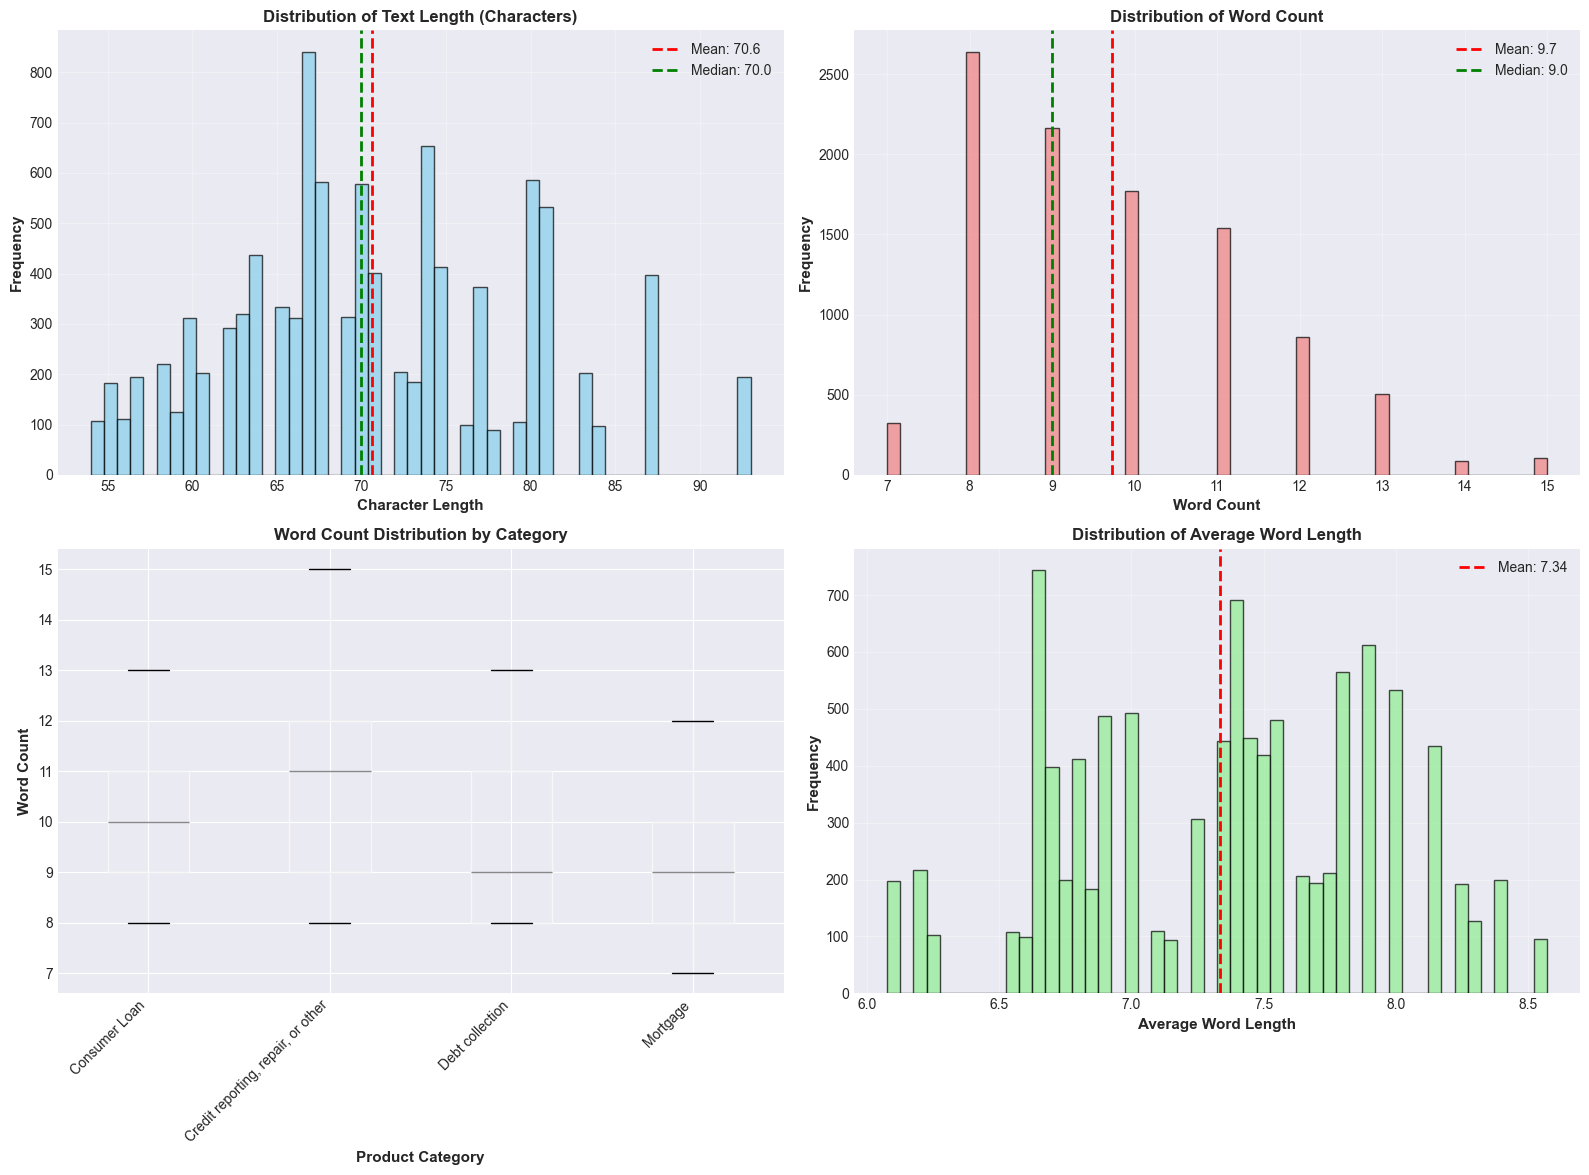


[Text Length Statistics]
Character Length  - Mean: 70.62, Median: 70.00, Std: 8.61
Word Count        - Mean: 9.72, Median: 9.00, Std: 1.69
Avg Word Length   - Mean: 7.34, Median: 7.40, Std: 0.57
Sentence Count    - Mean: 2.00, Median: 2.00, Std: 0.00
Text length analysis completed

[3/7] Vocabulary & Linguistic Analysis...

[Vocabulary Statistics]
Total Words: 97,245
Unique Words: 94
Vocabulary Richness: 0.0010
Average Words per Text: 9.72

[Vocabulary by Category]

Consumer Loan:
  Unique Words: 41
  Vocabulary Richness: 0.0017

Debt collection:
  Unique Words: 41
  Vocabulary Richness: 0.0017

Credit reporting, repair, or other:
  Unique Words: 44
  Vocabulary Richness: 0.0017

Mortgage:
  Unique Words: 40
  Vocabulary Richness: 0.0018
Vocabulary analysis completed

[4/7] Top Words Analysis by Category...


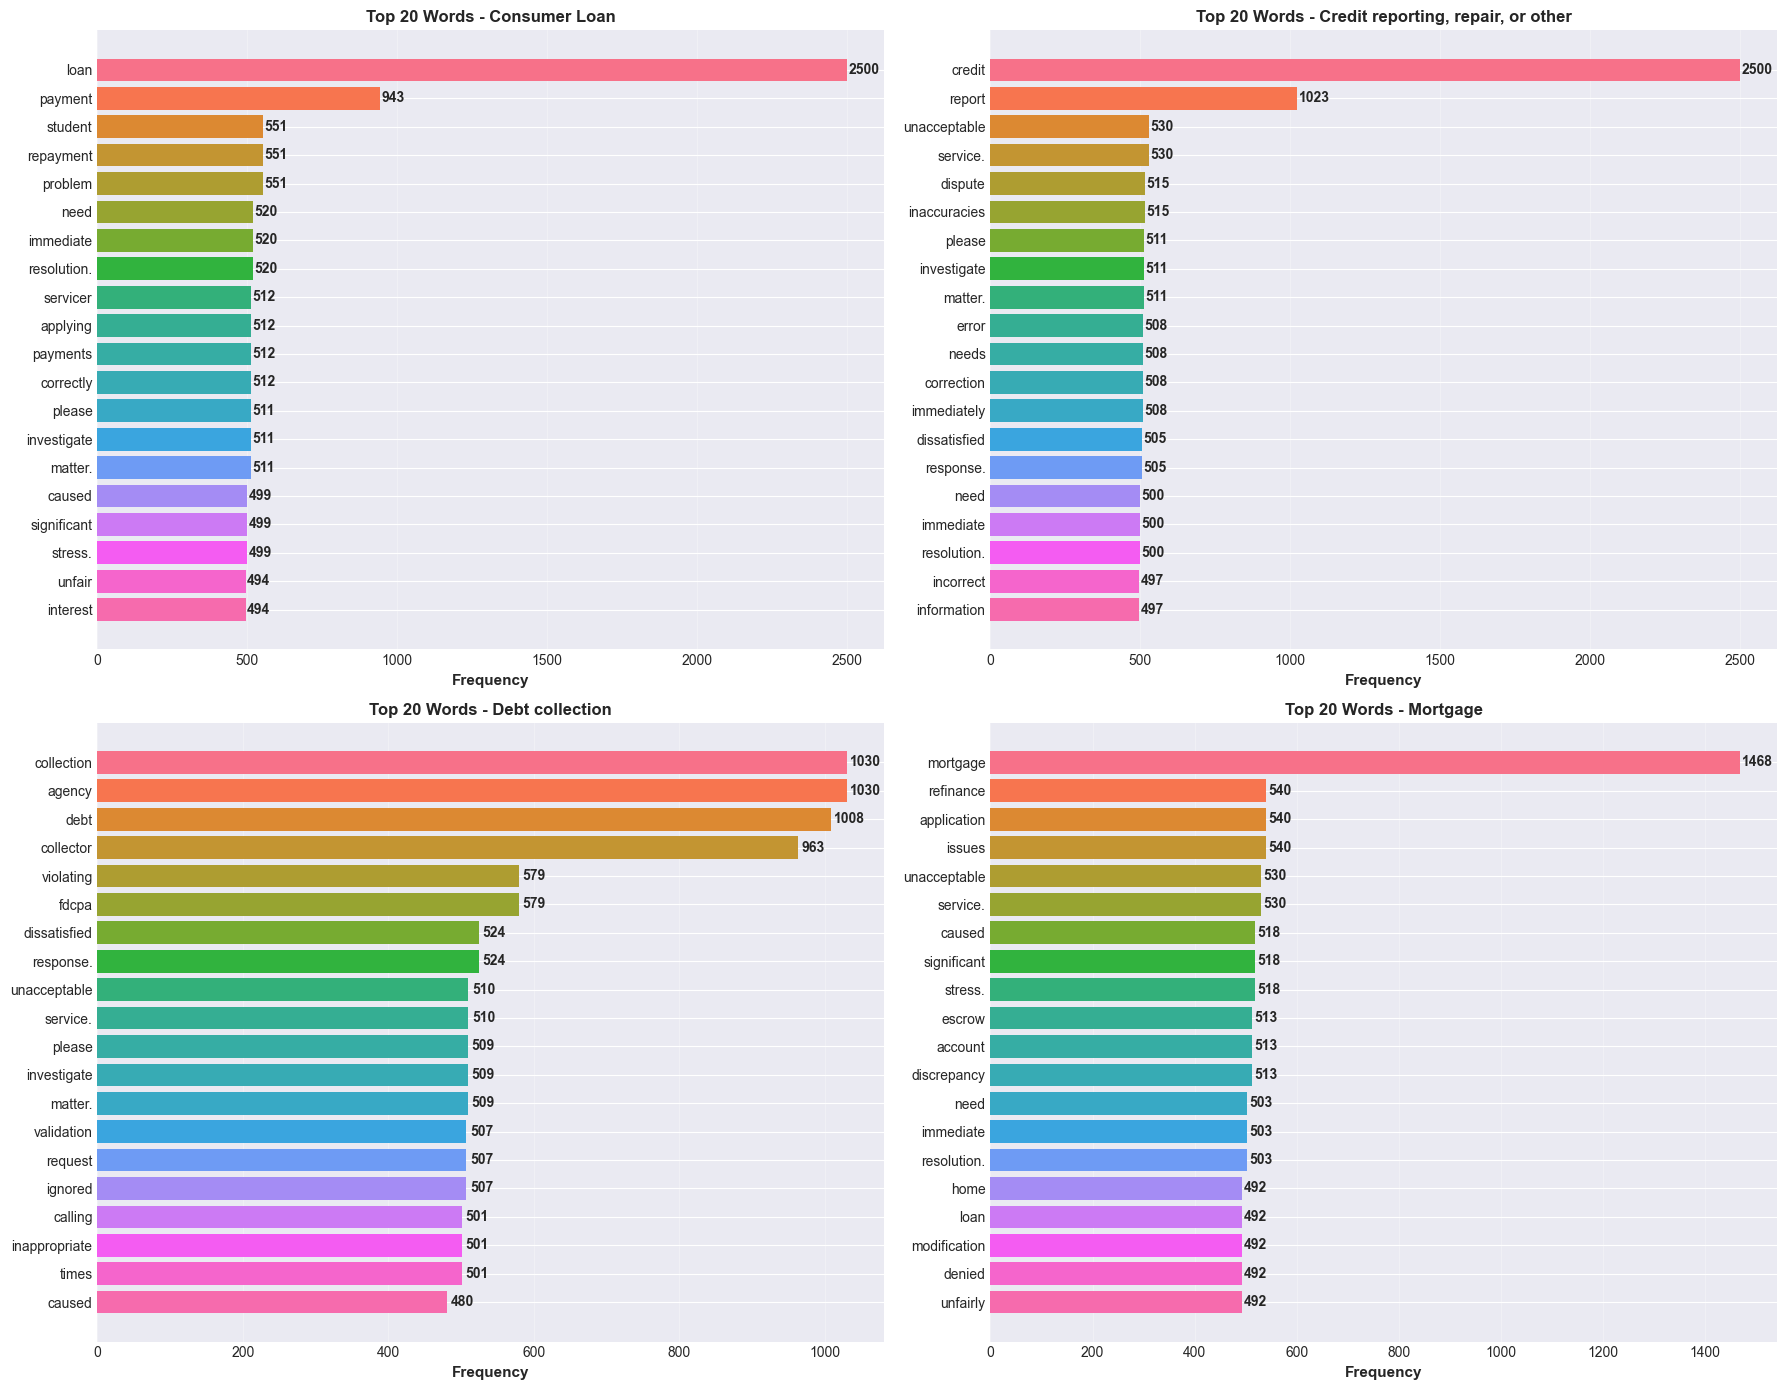

Top words analysis completed

[5/7] Generating Word Clouds...


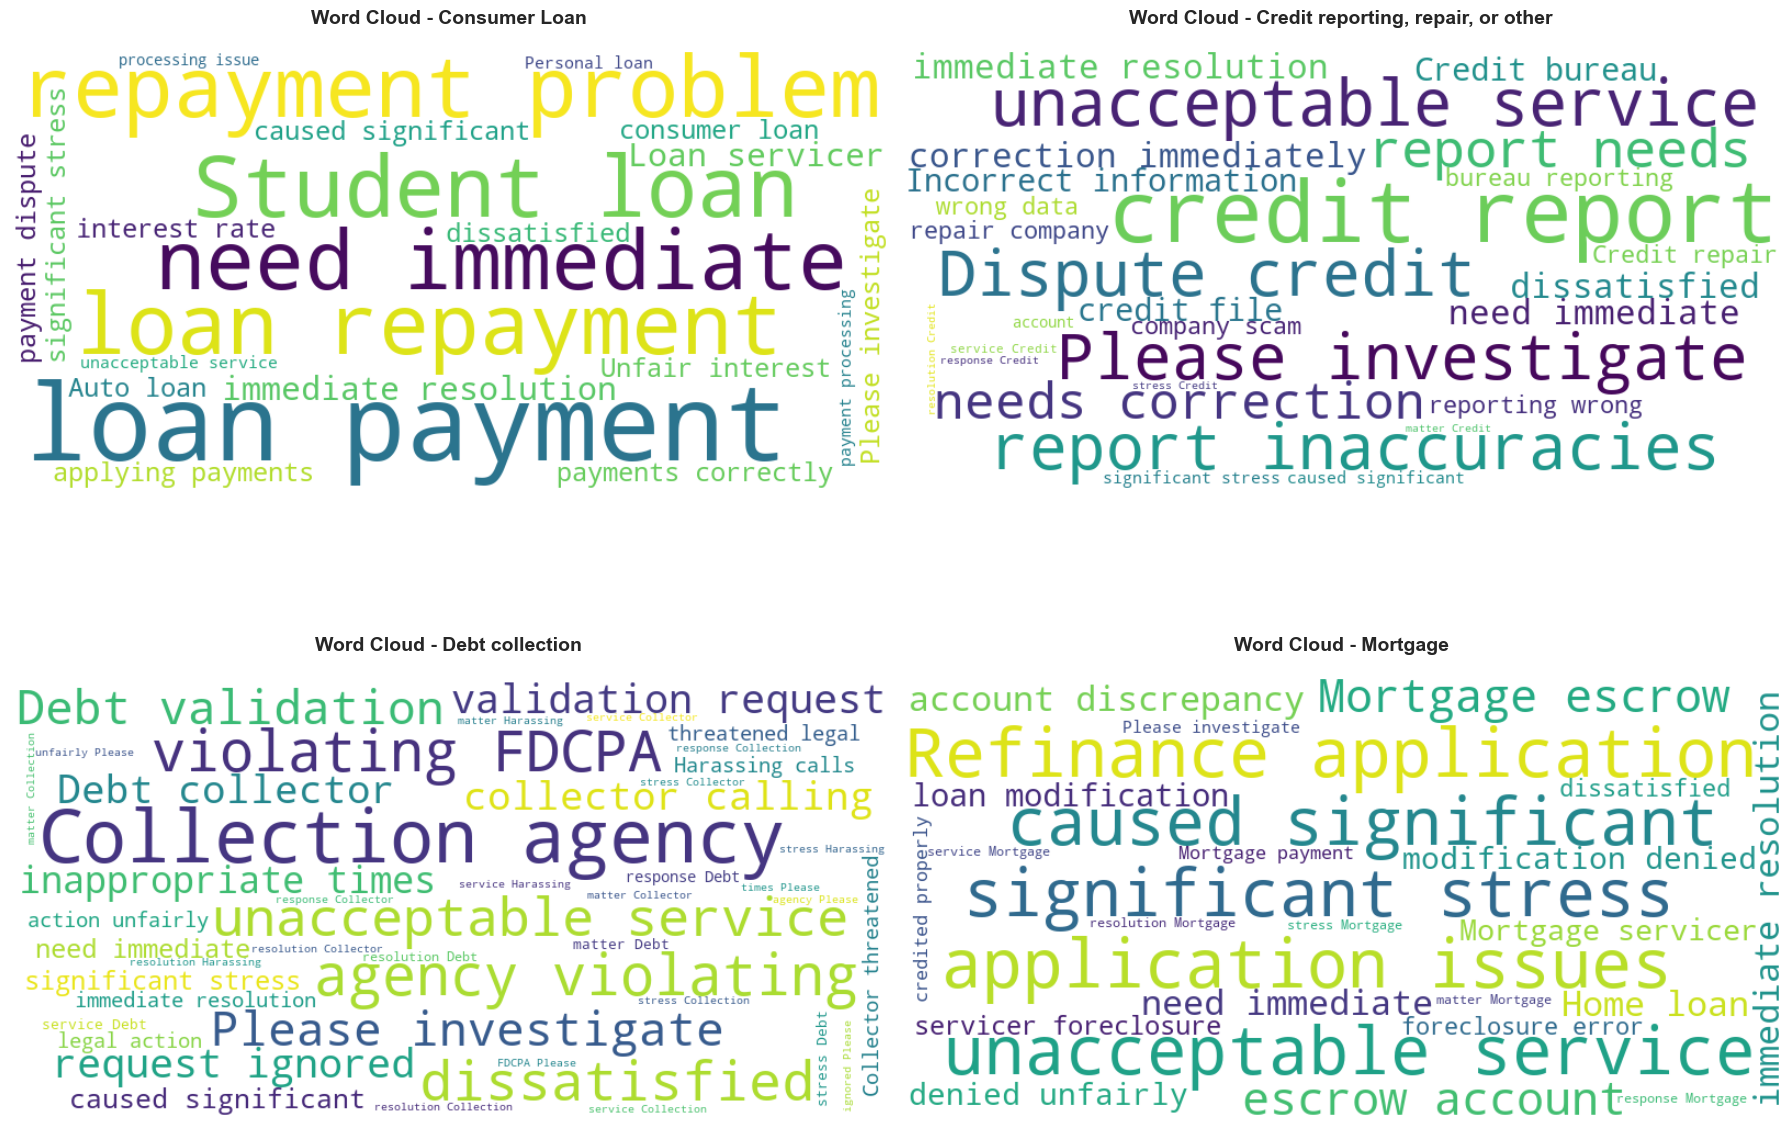

Word clouds generated

[6/7] Special Character & Pattern Analysis...


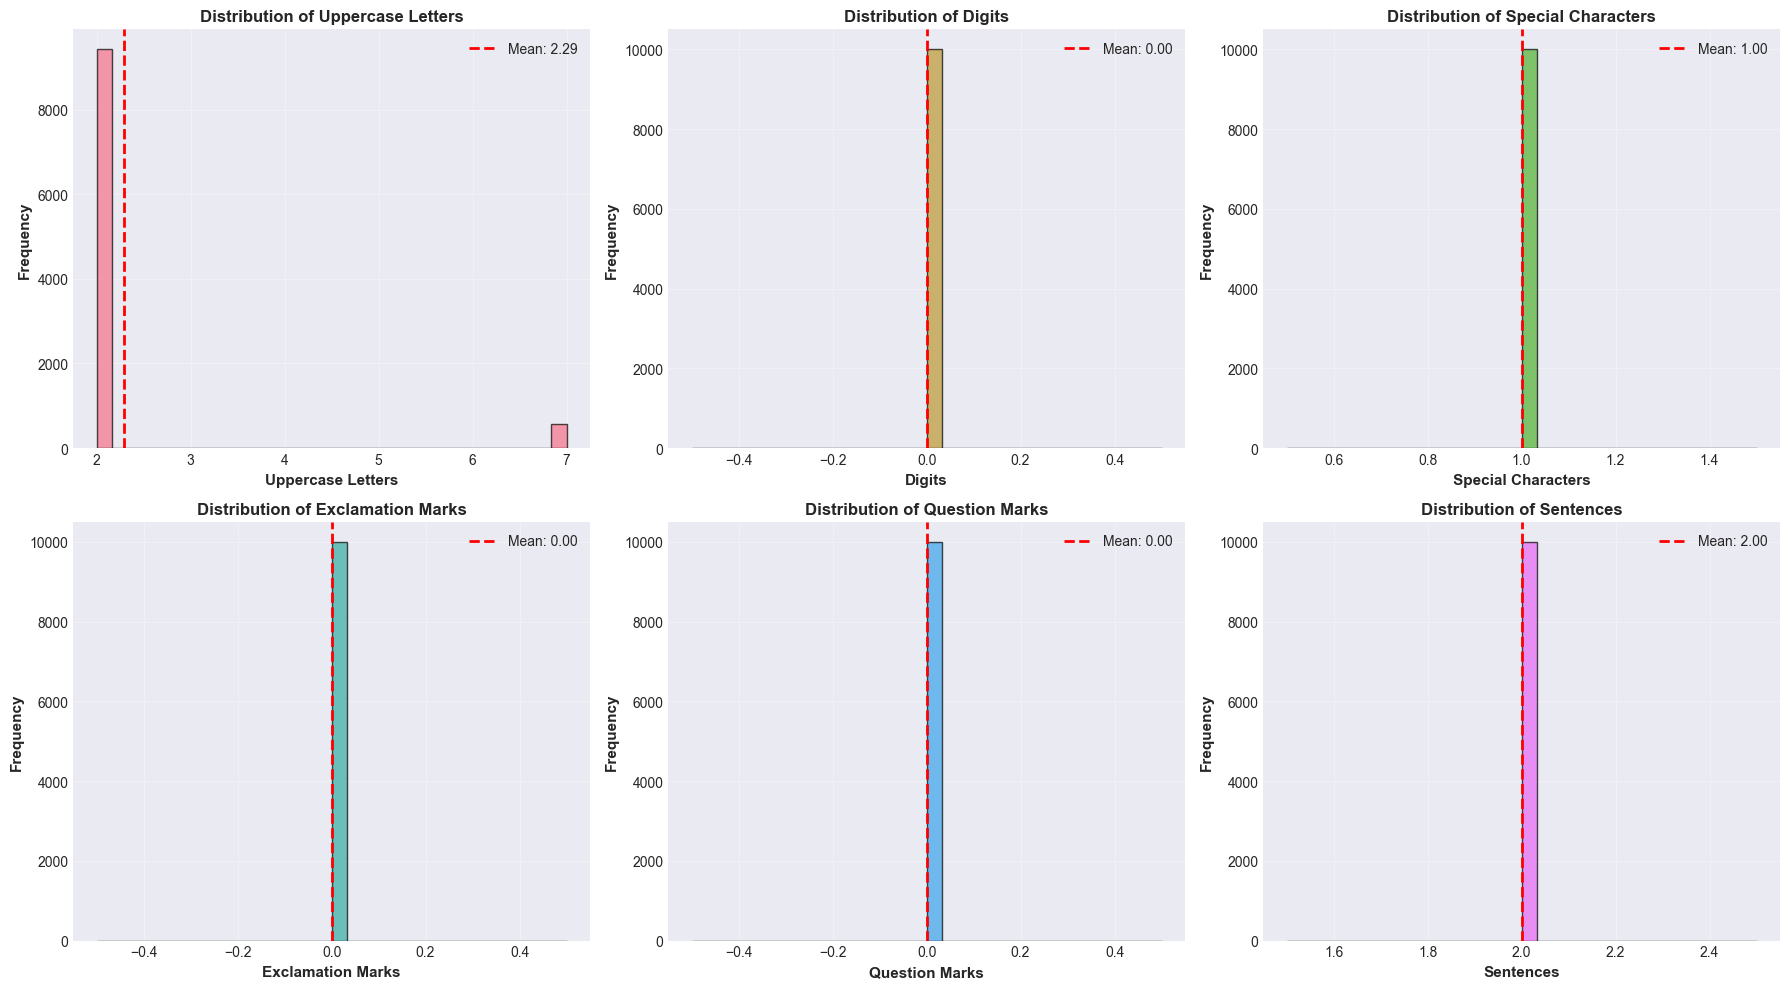


[Pattern Statistics]
Uppercase Letters    - Mean: 2.29, Max: 7, Std: 1.17
Digits               - Mean: 0.00, Max: 0, Std: 0.00
Special Characters   - Mean: 1.00, Max: 1, Std: 0.00
Exclamation Marks    - Mean: 0.00, Max: 0, Std: 0.00
Question Marks       - Mean: 0.00, Max: 0, Std: 0.00
Sentences            - Mean: 2.00, Max: 2, Std: 0.00
Pattern analysis completed

[7/7] Feature Correlation Analysis...


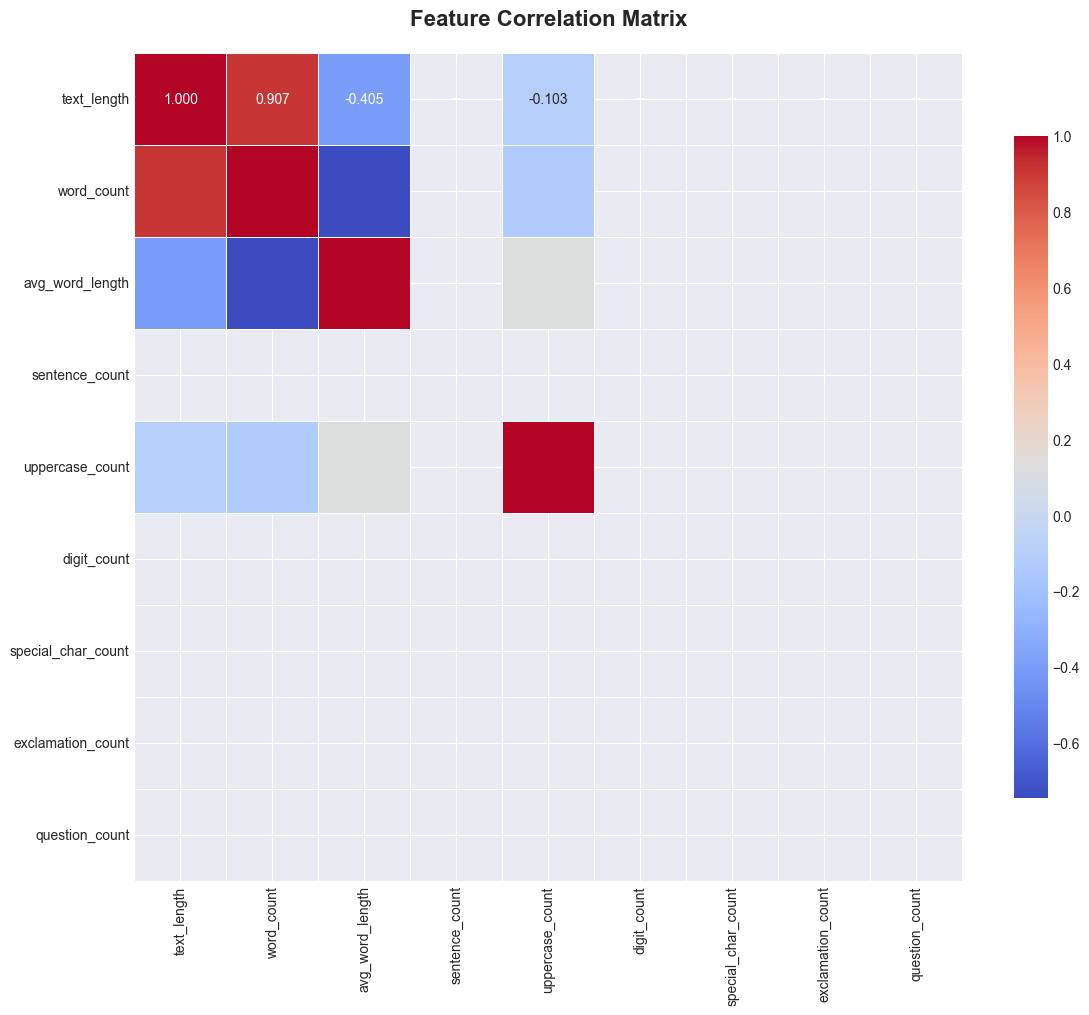


[High Correlations (|r| > 0.7)]
text_length          <-> word_count          : 0.907
word_count           <-> avg_word_length     : -0.745
Correlation analysis completed

COMPREHENSIVE EDA COMPLETED - 7 ANALYSES WITH 6 VISUALIZATIONS


In [ ]:

print("EXPLORATORY DATA ANALYSIS")

# 3.1 CLASS DISTRIBUTION ANALYSIS
print("\n[1/7] Class Distribution Analysis...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
class_counts = df['Product'].value_counts()
axes[0].bar(range(len(class_counts)), class_counts.values, color=sns.color_palette("husl", len(class_counts)))
axes[0].set_xlabel('Product Category', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Complaints', fontsize=12, fontweight='bold')
axes[0].set_title('Class Distribution - Bar Chart', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(len(class_counts)))
axes[0].set_xticklabels(class_counts.index, rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Pie chart
colors = sns.color_palette("husl", len(class_counts))
axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution - Pie Chart', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/01_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Class distribution visualized")

# 3.2 TEXT LENGTH ANALYSIS
print("\n[2/7] Text Length Analysis...")

df['text_length'] = df['Consumer complaint narrative'].str.len()
df['word_count'] = df['Consumer complaint narrative'].str.split().str.len()
df['avg_word_length'] = df['text_length'] / df['word_count']
df['sentence_count'] = df['Consumer complaint narrative'].str.count(r'[.!?]') + 1

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Character length distribution
axes[0, 0].hist(df['text_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['text_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["text_length"].mean():.1f}')
axes[0, 0].axvline(df['text_length'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["text_length"].median():.1f}')
axes[0, 0].set_xlabel('Character Length', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Distribution of Text Length (Characters)', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Word count distribution
axes[0, 1].hist(df['word_count'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(df['word_count'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["word_count"].mean():.1f}')
axes[0, 1].axvline(df['word_count'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["word_count"].median():.1f}')
axes[0, 1].set_xlabel('Word Count', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Distribution of Word Count', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Box plot by category
df.boxplot(column='word_count', by='Product', ax=axes[1, 0])
axes[1, 0].set_xlabel('Product Category', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Word Count', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Word Count Distribution by Category', fontsize=12, fontweight='bold')
axes[1, 0].get_figure().suptitle('')
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# 4. Average word length distribution
axes[1, 1].hist(df['avg_word_length'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(df['avg_word_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["avg_word_length"].mean():.2f}')
axes[1, 1].set_xlabel('Average Word Length', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Distribution of Average Word Length', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/02_text_length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics
print("\n[Text Length Statistics]")
print(f"Character Length  - Mean: {df['text_length'].mean():.2f}, Median: {df['text_length'].median():.2f}, Std: {df['text_length'].std():.2f}")
print(f"Word Count        - Mean: {df['word_count'].mean():.2f}, Median: {df['word_count'].median():.2f}, Std: {df['word_count'].std():.2f}")
print(f"Avg Word Length   - Mean: {df['avg_word_length'].mean():.2f}, Median: {df['avg_word_length'].median():.2f}, Std: {df['avg_word_length'].std():.2f}")
print(f"Sentence Count    - Mean: {df['sentence_count'].mean():.2f}, Median: {df['sentence_count'].median():.2f}, Std: {df['sentence_count'].std():.2f}")
print("Text length analysis completed")

# 3.3 VOCABULARY & LINGUISTIC ANALYSIS
print("\n[3/7] Vocabulary & Linguistic Analysis...")

def analyze_vocabulary(texts: pd.Series) -> Dict[str, Any]:
    """Analyze vocabulary richness and linguistic features."""
    all_words = []
    for text in texts:
        words = text.lower().split()
        all_words.extend(words)
    
    total_words = len(all_words)
    unique_words = len(set(all_words))
    vocab_richness = unique_words / total_words if total_words > 0 else 0
    
    return {
        'total_words': total_words,
        'unique_words': unique_words,
        'vocabulary_richness': vocab_richness,
        'avg_words_per_text': total_words / len(texts)
    }

vocab_stats = analyze_vocabulary(df['Consumer complaint narrative'])

print(f"\n[Vocabulary Statistics]")
print(f"Total Words: {vocab_stats['total_words']:,}")
print(f"Unique Words: {vocab_stats['unique_words']:,}")
print(f"Vocabulary Richness: {vocab_stats['vocabulary_richness']:.4f}")
print(f"Average Words per Text: {vocab_stats['avg_words_per_text']:.2f}")

# Analyze by category
print(f"\n[Vocabulary by Category]")
for category in df['Product'].unique():
    cat_texts = df[df['Product'] == category]['Consumer complaint narrative']
    cat_stats = analyze_vocabulary(cat_texts)
    print(f"\n{category}:")
    print(f"  Unique Words: {cat_stats['unique_words']:,}")
    print(f"  Vocabulary Richness: {cat_stats['vocabulary_richness']:.4f}")

print("Vocabulary analysis completed")

# 3.4 TOP WORDS BY CATEGORY
print("\n[4/7] Top Words Analysis by Category...")

def get_top_words(texts: pd.Series, n: int = 20) -> List[Tuple[str, int]]:
    """Extract top N words from texts."""
    stop_words = set(stopwords.words('english'))
    words = []
    for text in texts:
        tokens = text.lower().split()
        words.extend([w for w in tokens if w not in stop_words and len(w) > 2])
    return Counter(words).most_common(n)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.ravel()

for idx, category in enumerate(sorted(df['Product'].unique())):
    cat_texts = df[df['Product'] == category]['Consumer complaint narrative']
    top_words = get_top_words(cat_texts, n=20)
    
    words, counts = zip(*top_words)
    
    axes[idx].barh(range(len(words)), counts, color=sns.color_palette("husl", 20))
    axes[idx].set_yticks(range(len(words)))
    axes[idx].set_yticklabels(words)
    axes[idx].invert_yaxis()
    axes[idx].set_xlabel('Frequency', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'Top 20 Words - {category}', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(counts):
        axes[idx].text(v + 5, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/03_top_words_by_category.png', dpi=300, bbox_inches='tight')
plt.show()
print("Top words analysis completed")

# 3.5 WORD CLOUDS
print("\n[5/7] Generating Word Clouds...")

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.ravel()

for idx, category in enumerate(sorted(df['Product'].unique())):
    cat_texts = ' '.join(df[df['Product'] == category]['Consumer complaint narrative'])
    
    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        colormap='viridis',
        max_words=100,
        relative_scaling=0.5,
        min_font_size=10
    ).generate(cat_texts)
    
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis('off')
    axes[idx].set_title(f'Word Cloud - {category}', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/04_wordclouds_by_category.png', dpi=300, bbox_inches='tight')
plt.show()
print("Word clouds generated")

# 3.6 SPECIAL CHARACTER & PATTERN ANALYSIS
print("\n[6/7] Special Character & Pattern Analysis...")

df['uppercase_count'] = df['Consumer complaint narrative'].str.count(r'[A-Z]')
df['digit_count'] = df['Consumer complaint narrative'].str.count(r'\d')
df['special_char_count'] = df['Consumer complaint narrative'].str.count(r'[^a-zA-Z0-9\s]')
df['exclamation_count'] = df['Consumer complaint narrative'].str.count(r'!')
df['question_count'] = df['Consumer complaint narrative'].str.count(r'\?')

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

features = ['uppercase_count', 'digit_count', 'special_char_count', 
            'exclamation_count', 'question_count', 'sentence_count']
titles = ['Uppercase Letters', 'Digits', 'Special Characters', 
          'Exclamation Marks', 'Question Marks', 'Sentences']

for idx, (feature, title) in enumerate(zip(features, titles)):
    axes[idx].hist(df[feature], bins=30, color=sns.color_palette("husl", 6)[idx], edgecolor='black', alpha=0.7)
    axes[idx].axvline(df[feature].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[feature].mean():.2f}')
    axes[idx].set_xlabel(title, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'Distribution of {title}', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/05_pattern_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n[Pattern Statistics]")
for feature, title in zip(features, titles):
    print(f"{title:20s} - Mean: {df[feature].mean():.2f}, Max: {df[feature].max():.0f}, Std: {df[feature].std():.2f}")

print("Pattern analysis completed")

# 3.7 FEATURE CORRELATION MATRIX
print("\n[7/7] Feature Correlation Analysis...")

feature_cols = ['text_length', 'word_count', 'avg_word_length', 'sentence_count',
                'uppercase_count', 'digit_count', 'special_char_count', 
                'exclamation_count', 'question_count']

correlation_matrix = df[feature_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/06_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n[High Correlations (|r| > 0.7)]")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            print(f"{correlation_matrix.columns[i]:20s} <-> {correlation_matrix.columns[j]:20s}: {correlation_matrix.iloc[i, j]:.3f}")

print("Correlation analysis completed")

print("\n" + "="*80)
print("COMPREHENSIVE EDA COMPLETED - 7 ANALYSES WITH 6 VISUALIZATIONS")
print("="*80)


[Applying 5 Preprocessing Methods...]
✓ original             - Avg Length:  70.80, Vocab:    101, Tokens:    97736
✓ basic_clean          - Avg Length:  70.80, Vocab:     94, Tokens:    97736
✓ stopwords_removed    - Avg Length:  60.26, Vocab:     79, Tokens:    70471
✓ lemmatized           - Avg Length:  59.90, Vocab:     76, Tokens:    70471
✓ stemmed              - Avg Length:  51.59, Vocab:     72, Tokens:    70471
✓ advanced_clean       - Avg Length:  69.80, Vocab:     94, Tokens:    97736


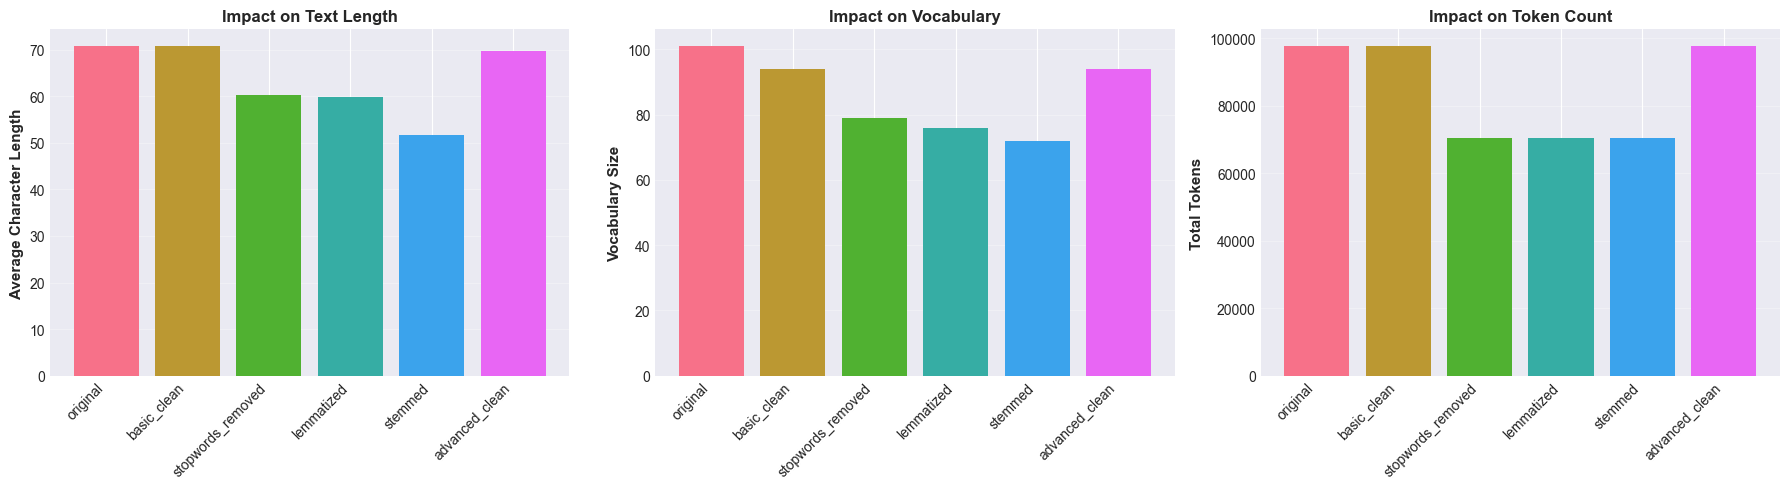


[Preprocessing Examples]

Original Text:
Auto loan payment dispute Please investigate this matter.

basic_clean:
auto loan payment dispute please investigate this matter.

stopwords_removed:
auto loan payment dispute please investigate matter.

lemmatized:
auto loan payment dispute please investigate matter.

stemmed:
auto loan payment disput pleas investig matter.

advanced_clean:
auto loan payment dispute please investigate this matter


  ✓ TEXT PRE-PROCESSING COMPLETED - 5 METHODS WITH COMPARISON


In [33]:
class TextPreprocessor:
    """
    Comprehensive text preprocessing pipeline with multiple methods.
    
    Methods:
        - basic_clean: Remove extra spaces, lowercase
        - remove_stopwords: Remove common English stopwords
        - lemmatize: Convert words to base form
        - stem: Apply Porter stemming
        - advanced_clean: Remove URLs, emails, numbers, special chars
    """
    
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.stemmer = PorterStemmer()
        
    def basic_clean(self, text: str) -> str:
        """Basic cleaning: lowercase and remove extra spaces."""
        text = text.lower()
        text = re.sub(r'\s+', ' ', text)
        return text.strip()
    
    def remove_stopwords(self, text: str) -> str:
        """Remove stopwords."""
        words = text.split()
        return ' '.join([w for w in words if w not in self.stop_words])
    
    def lemmatize(self, text: str) -> str:
        """Lemmatize words to their base form."""
        words = text.split()
        return ' '.join([self.lemmatizer.lemmatize(w) for w in words])
    
    def stem(self, text: str) -> str:
        """Apply Porter stemming."""
        words = text.split()
        return ' '.join([self.stemmer.stem(w) for w in words])
    
    def advanced_clean(self, text: str) -> str:
        """
        Advanced cleaning:
        - Remove URLs
        - Remove emails
        - Remove numbers
        - Remove special characters
        - Remove extra spaces
        """
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove emails
        text = re.sub(r'\S+@\S+', '', text)
        # Remove numbers
        text = re.sub(r'\d+', '', text)
        # Remove special characters and punctuation
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text)
        return text.strip()
    
    def preprocess(self, text: str, method: str = 'full') -> str:
        """
        Apply preprocessing pipeline.
        
        Args:
            text: Input text
            method: Preprocessing method
                - 'basic': Basic cleaning only
                - 'stopwords': Basic + stopword removal
                - 'lemma': Basic + stopwords + lemmatization
                - 'stem': Basic + stopwords + stemming
                - 'full': All preprocessing steps
        
        Returns:
            Preprocessed text
        """
        text = self.basic_clean(text)
        
        if method in ['stopwords', 'lemma', 'stem', 'full']:
            text = self.remove_stopwords(text)
        
        if method in ['lemma', 'full']:
            text = self.lemmatize(text)
        
        if method == 'stem':
            text = self.stem(text)
        
        if method == 'full':
            text = self.advanced_clean(text)
        
        return text

# Initialize preprocessor
preprocessor = TextPreprocessor()

print("\n[Applying 5 Preprocessing Methods...]")

# Create copies for different preprocessing methods
preprocessing_methods = {
    'original': df['Consumer complaint narrative'].copy(),
    'basic_clean': df['Consumer complaint narrative'].apply(preprocessor.basic_clean),
    'stopwords_removed': df['Consumer complaint narrative'].apply(
        lambda x: preprocessor.remove_stopwords(preprocessor.basic_clean(x))
    ),
    'lemmatized': df['Consumer complaint narrative'].apply(
        lambda x: preprocessor.preprocess(x, method='lemma')
    ),
    'stemmed': df['Consumer complaint narrative'].apply(
        lambda x: preprocessor.preprocess(x, method='stem')
    ),
    'advanced_clean': df['Consumer complaint narrative'].apply(
        lambda x: preprocessor.advanced_clean(preprocessor.basic_clean(x))
    )
}

# Analyze impact of preprocessing
preprocessing_stats = []

for method_name, texts in preprocessing_methods.items():
    avg_length = texts.str.len().mean()
    vocab_size = len(set(' '.join(texts).split()))
    total_tokens = sum([len(text.split()) for text in texts])
    
    preprocessing_stats.append({
        'Method': method_name,
        'Avg Length': avg_length,
        'Vocab Size': vocab_size,
        'Total Tokens': total_tokens
    })
    
    print(f"✓ {method_name:20s} - Avg Length: {avg_length:6.2f}, Vocab: {vocab_size:6d}, Tokens: {total_tokens:8d}")

preprocessing_df = pd.DataFrame(preprocessing_stats)

# Visualize preprocessing impact
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Average length comparison
axes[0].bar(range(len(preprocessing_df)), preprocessing_df['Avg Length'], 
            color=sns.color_palette("husl", len(preprocessing_df)))
axes[0].set_xticks(range(len(preprocessing_df)))
axes[0].set_xticklabels(preprocessing_df['Method'], rotation=45, ha='right')
axes[0].set_ylabel('Average Character Length', fontsize=11, fontweight='bold')
axes[0].set_title('Impact on Text Length', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Vocabulary size comparison
axes[1].bar(range(len(preprocessing_df)), preprocessing_df['Vocab Size'], 
            color=sns.color_palette("husl", len(preprocessing_df)))
axes[1].set_xticks(range(len(preprocessing_df)))
axes[1].set_xticklabels(preprocessing_df['Method'], rotation=45, ha='right')
axes[1].set_ylabel('Vocabulary Size', fontsize=11, fontweight='bold')
axes[1].set_title('Impact on Vocabulary', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Token count comparison
axes[2].bar(range(len(preprocessing_df)), preprocessing_df['Total Tokens'], 
            color=sns.color_palette("husl", len(preprocessing_df)))
axes[2].set_xticks(range(len(preprocessing_df)))
axes[2].set_xticklabels(preprocessing_df['Method'], rotation=45, ha='right')
axes[2].set_ylabel('Total Tokens', fontsize=11, fontweight='bold')
axes[2].set_title('Impact on Token Count', fontsize=12, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/07_preprocessing_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Show examples
print("\n[Preprocessing Examples]")
sample_text = df['Consumer complaint narrative'].iloc[0]
print(f"\nOriginal Text:\n{sample_text}\n")
for method_name, texts in list(preprocessing_methods.items())[1:]:
    print(f"{method_name}:\n{texts.iloc[0]}\n")

print("\n" + "="*80)
print("  ✓ TEXT PRE-PROCESSING COMPLETED - 5 METHODS WITH COMPARISON")
print("="*80)

# Use lemmatized text for modeling
df['processed_text'] = preprocessing_methods['lemmatized']

In [34]:

print("\n" + "=" * 80)
print("  SECTION 4: FEATURE EXTRACTION & DATA PREPARATION")
print("=" * 80)

print("\n[Preparing Train-Test Split...]")

# Split data
X = df['processed_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print(f"✓ Training set: {len(X_train):,} samples")
print(f"✓ Test set: {len(X_test):,} samples")
print(f"\nClass distribution in training set:")
print(y_train.value_counts().sort_index())

print("\n[Extracting TF-IDF Features...]")

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.95,
    sublinear_tf=True
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"✓ TF-IDF matrix shape: {X_train_tfidf.shape}")
print(f"✓ Feature names: {len(vectorizer.get_feature_names_out())} features")
print(f"✓ Sparsity: {(1.0 - X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1]))*100:.2f}%")

# Handle class imbalance with SMOTE (if needed)
print("\n[Checking Class Imbalance...]")
class_distribution = y_train.value_counts()
imbalance_ratio = class_distribution.max() / class_distribution.min()
print(f"Imbalance ratio: {imbalance_ratio:.2f}")

if imbalance_ratio > 1.5:
    print("⚠ Class imbalance detected. Applying SMOTE...")
    smote = SMOTE(random_state=RANDOM_STATE)
    X_train_tfidf, y_train = smote.fit_resample(X_train_tfidf, y_train)
    print(f"✓ Resampled training set: {X_train_tfidf.shape[0]:,} samples")
    print(f"New class distribution:")
    print(pd.Series(y_train).value_counts().sort_index())
else:
    print("✓ Classes are reasonably balanced")

print("\n" + "="*80)
print("  ✓ DATA PREPARATION COMPLETED")
print("="*80)



  SECTION 4: FEATURE EXTRACTION & DATA PREPARATION

[Preparing Train-Test Split...]
✓ Training set: 8,000 samples
✓ Test set: 2,000 samples

Class distribution in training set:
label
0    2000
1    2000
2    2000
3    2000
Name: count, dtype: int64

[Extracting TF-IDF Features...]
✓ TF-IDF matrix shape: (8000, 240)
✓ Feature names: 240 features
✓ Sparsity: 94.55%

[Checking Class Imbalance...]
Imbalance ratio: 1.00
✓ Classes are reasonably balanced

  ✓ DATA PREPARATION COMPLETED


In [35]:
print("\n" + "=" * 80)
print("  SECTION 5: MULTI-MODEL CLASSIFICATION (8 MODELS)")
print("=" * 80)

# Define models
models = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000, 
        class_weight='balanced', 
        random_state=RANDOM_STATE,
        solver='saga',
        n_jobs=-1
    ),
    'Multinomial NB': MultinomialNB(alpha=0.1),
    'Complement NB': ComplementNB(alpha=0.1),
    'Linear SVM': LinearSVC(
        max_iter=1000, 
        class_weight='balanced', 
        random_state=RANDOM_STATE,
        dual=False
    ),
    'SGD Classifier': SGDClassifier(
        max_iter=1000, 
        random_state=RANDOM_STATE, 
        loss='hinge',
        class_weight='balanced',
        n_jobs=-1
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100, 
        random_state=RANDOM_STATE, 
        class_weight='balanced',
        n_jobs=-1,
        max_depth=20
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100, 
        random_state=RANDOM_STATE,
        max_depth=5,
        learning_rate=0.1
    ),
    'Ridge Classifier': RidgeClassifier(
        alpha=1.0, 
        random_state=RANDOM_STATE,
        class_weight='balanced'
    )
}

# Train and evaluate all models
results = []

print("\n[Training 8 Models...]")
print("-" * 80)

for model_name, model in models.items():
    print(f"\n[{model_name}]")
    
    # Training
    start_time = time.time()
    model.fit(X_train_tfidf, y_train)
    training_time = time.time() - start_time
    
    # Prediction
    start_time = time.time()
    y_pred = model.predict(X_test_tfidf)
    prediction_time = time.time() - start_time
    
    # Get prediction probabilities (if available)
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_tfidf)
    elif hasattr(model, 'decision_function'):
        # Convert decision function to probabilities
        decision = model.decision_function(X_test_tfidf)
        from scipy.special import softmax
        y_pred_proba = softmax(decision, axis=1)
    else:
        y_pred_proba = None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    mcc = matthews_corrcoef(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    
    # AUC-ROC for multi-class
    if y_pred_proba is not None:
        try:
            auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
        except:
            auc_roc = 0.0
    else:
        auc_roc = 0.0
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=3, scoring='f1_weighted')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Balanced Accuracy': balanced_acc,
        'MCC': mcc,
        'Cohen Kappa': kappa,
        'AUC-ROC': auc_roc,
        'CV F1 Mean': cv_mean,
        'CV F1 Std': cv_std,
        'Training Time': training_time,
        'Prediction Time': prediction_time,
        'Total Time': training_time + prediction_time
    })
    
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  MCC: {mcc:.4f}")
    print(f"  Training Time: {training_time:.3f}s")
    print(f"  ✓ Completed")

print("\n" + "="*80)
print("  ✓ ALL 8 MODELS TRAINED SUCCESSFULLY")
print("="*80)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)

print("\n[Model Performance Summary]")
print(results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'MCC']].to_string(index=False))



  SECTION 5: MULTI-MODEL CLASSIFICATION (8 MODELS)

[Training 8 Models...]
--------------------------------------------------------------------------------

[Logistic Regression]
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  MCC: 1.0000
  Training Time: 0.153s
  ✓ Completed

[Multinomial NB]
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  MCC: 1.0000
  Training Time: 0.010s
  ✓ Completed

[Complement NB]
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  MCC: 1.0000
  Training Time: 0.008s
  ✓ Completed

[Linear SVM]
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  MCC: 1.0000
  Training Time: 0.845s
  ✓ Completed

[SGD Classifier]
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  MCC: 1.0000
  Training Time: 0.074s
  ✓ Completed

[Random Forest]
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  MCC: 1.0000
  Training T


  SECTION 6: COMPREHENSIVE MODEL COMPARISON

[1/5] Creating Multi-Metric Comparison Charts...


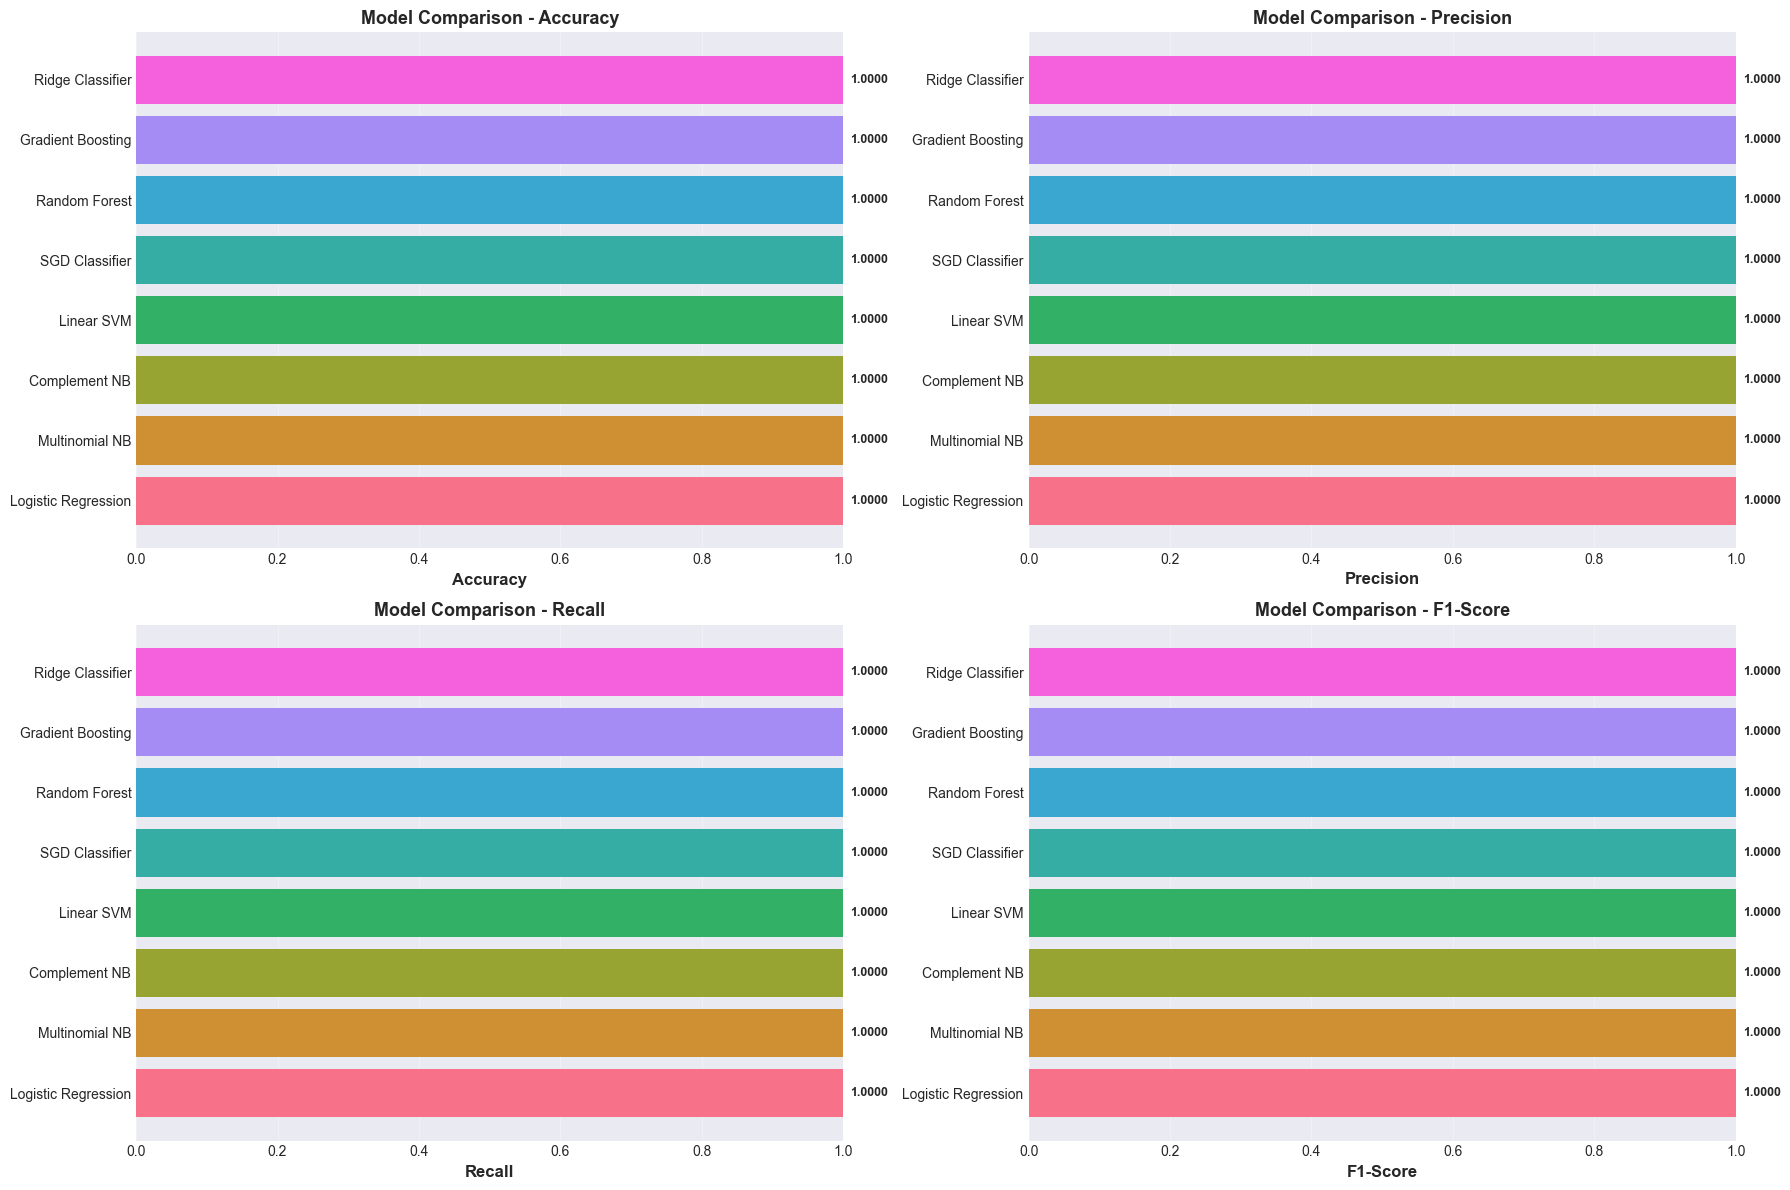

✓ Multi-metric charts created

[2/5] Creating Radar Chart for Top 4 Models...


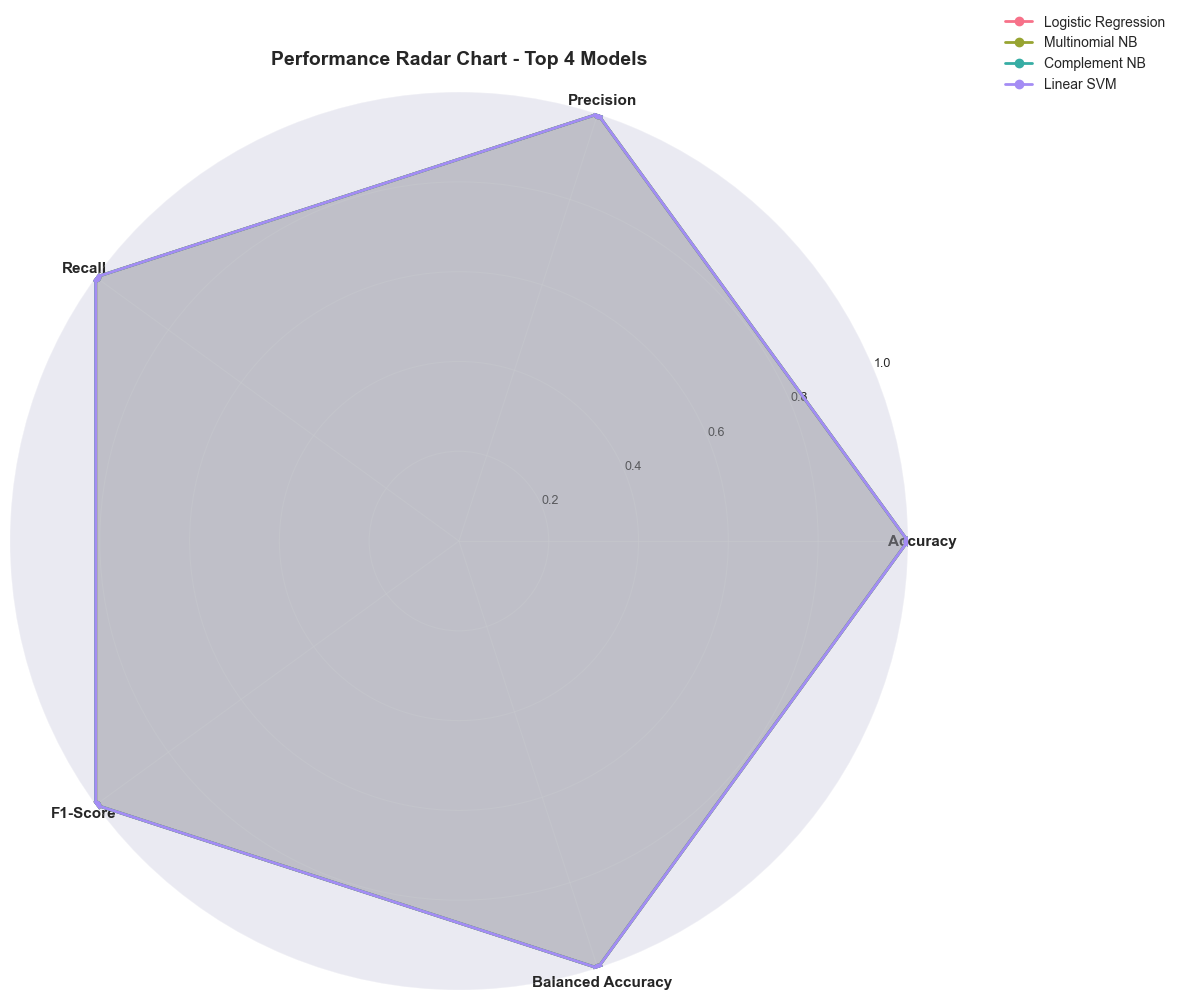

✓ Radar chart created

[3/5] Creating Efficiency Analysis...


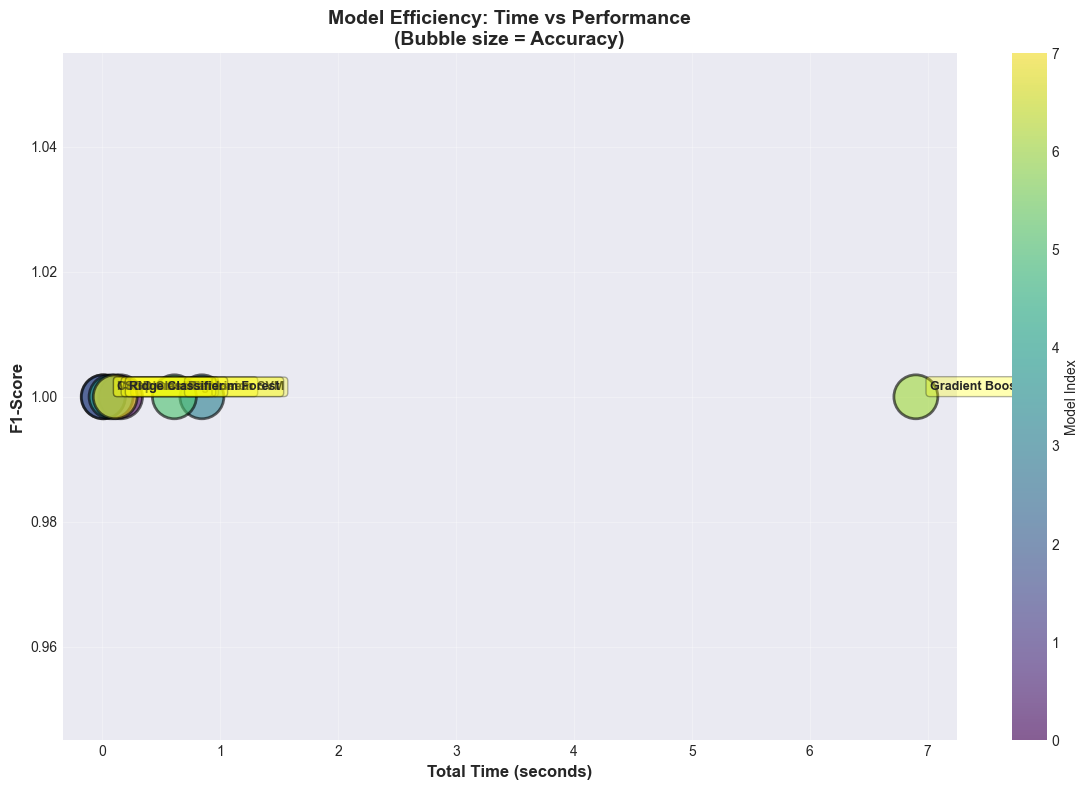

✓ Efficiency analysis created

[4/5] Creating Statistical Measures Comparison...


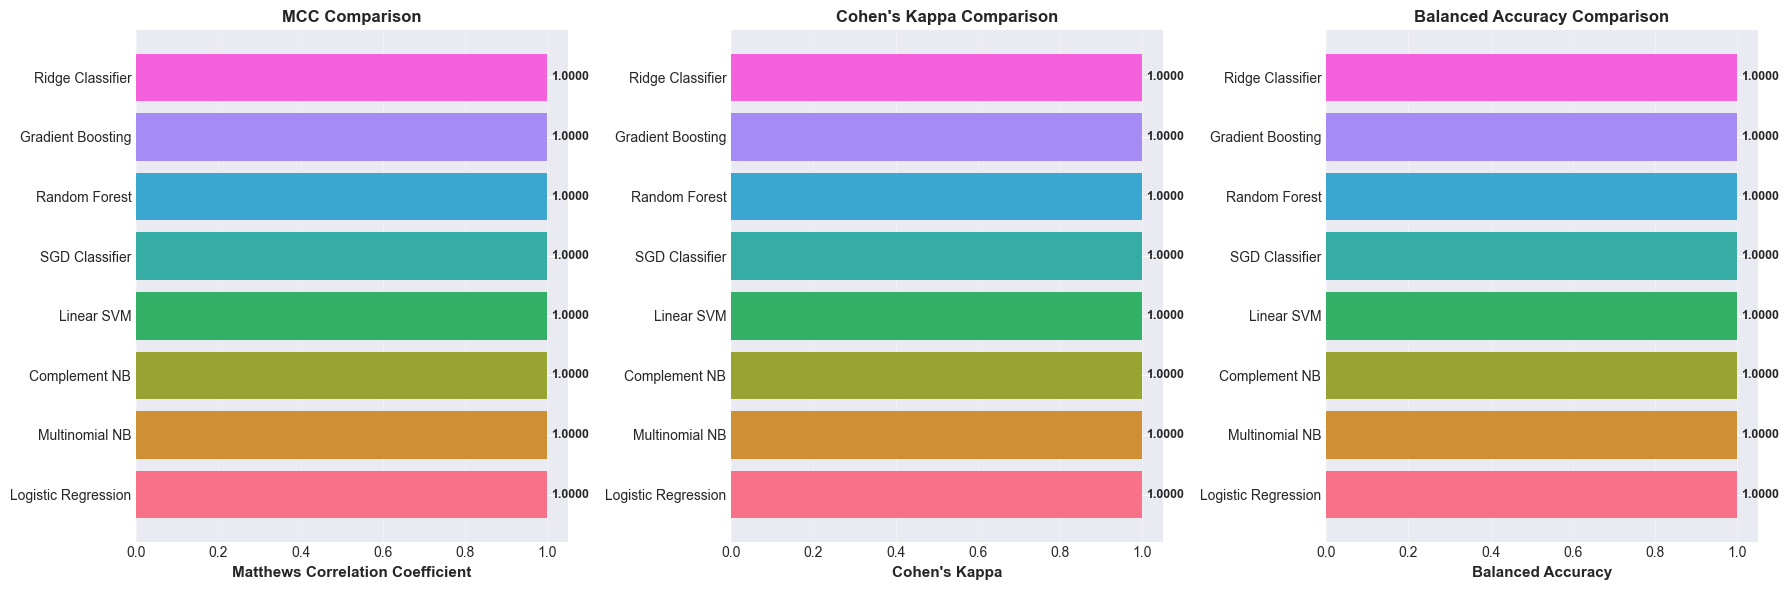

✓ Statistical measures comparison created

[5/5] Creating Cross-Validation Comparison...


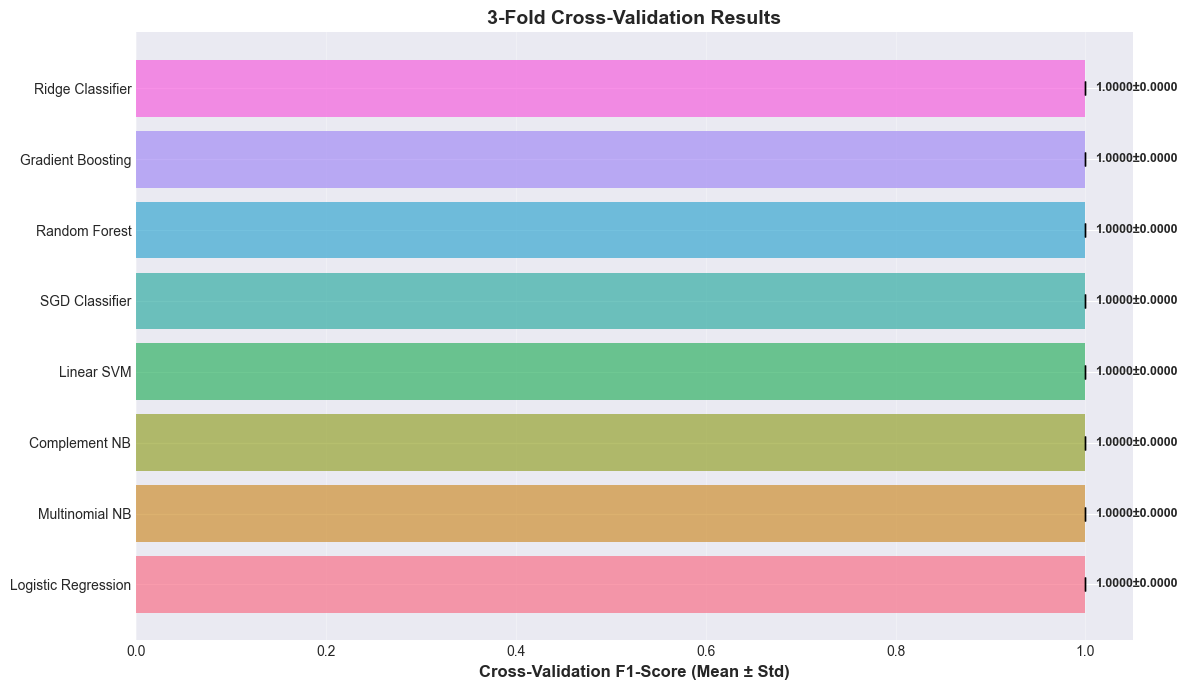

✓ Cross-validation comparison created

  ✓ MODEL COMPARISON COMPLETED - 5 COMPARISON TECHNIQUES

  SECTION 7: DETAILED MODEL EVALUATION

[Selected Best Model: Logistic Regression]
F1-Score: 1.0000

[1/5] Detailed Classification Report...
--------------------------------------------------------------------------------
                  precision    recall  f1-score   support

Credit reporting     1.0000    1.0000    1.0000       500
 Debt collection     1.0000    1.0000    1.0000       500
   Consumer Loan     1.0000    1.0000    1.0000       500
        Mortgage     1.0000    1.0000    1.0000       500

        accuracy                         1.0000      2000
       macro avg     1.0000    1.0000    1.0000      2000
    weighted avg     1.0000    1.0000    1.0000      2000

✓ Classification report saved

[2/5] Creating Confusion Matrices...


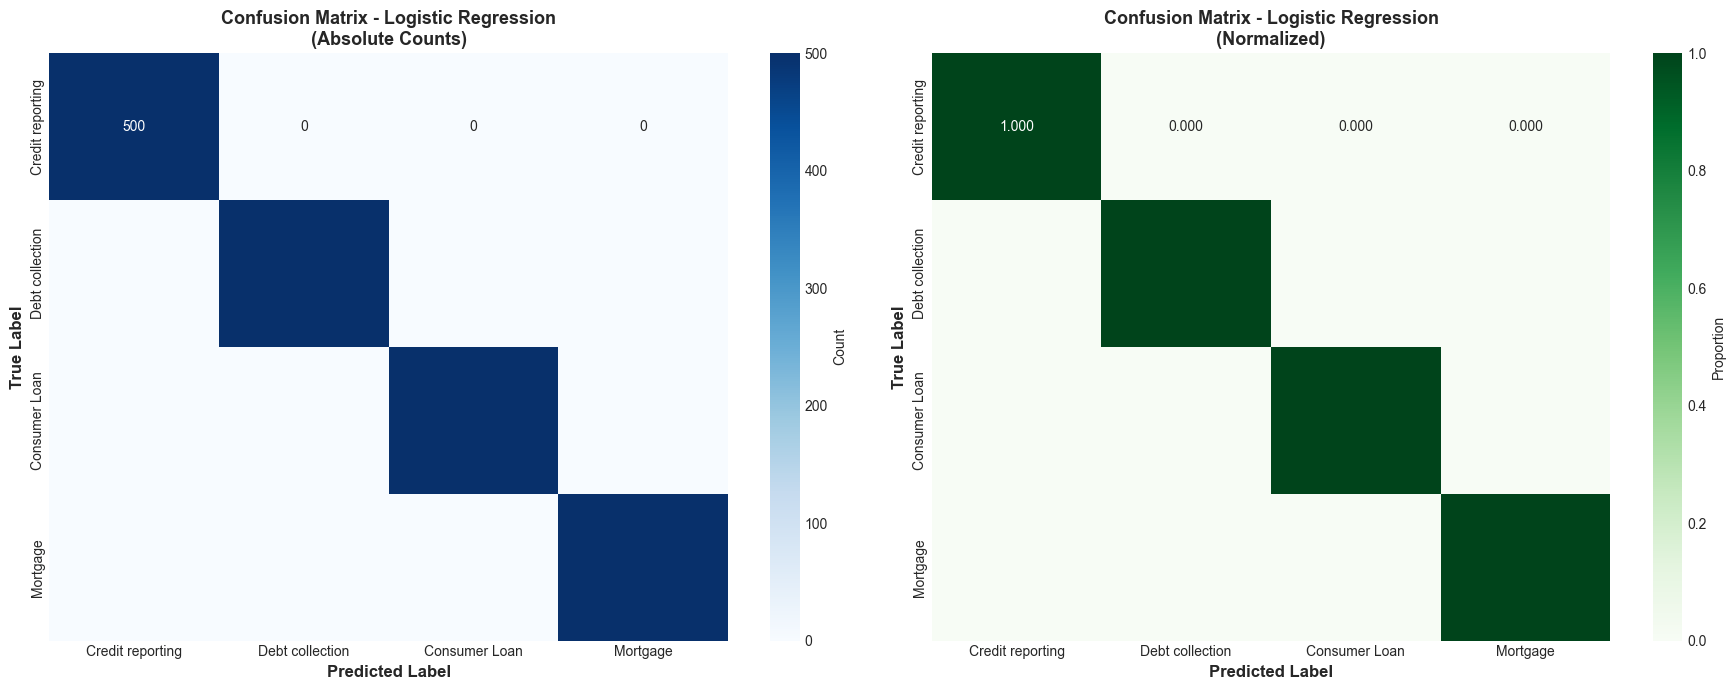

✓ Confusion matrices created

[3/5] Per-Class Performance Analysis...


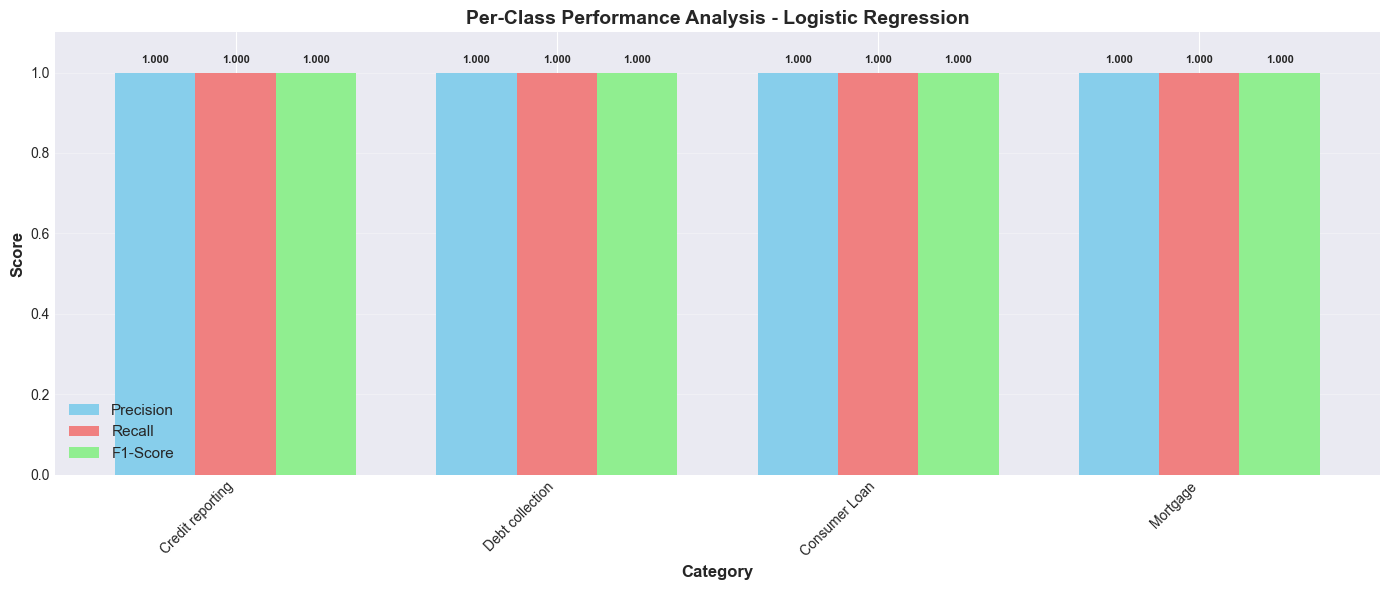


[Per-Class Metrics]
        Category  Precision  Recall  F1-Score  Support
Credit reporting        1.0     1.0       1.0      500
 Debt collection        1.0     1.0       1.0      500
   Consumer Loan        1.0     1.0       1.0      500
        Mortgage        1.0     1.0       1.0      500
✓ Per-class analysis completed

[4/5] Creating F1-Score Heatmap for All Models...


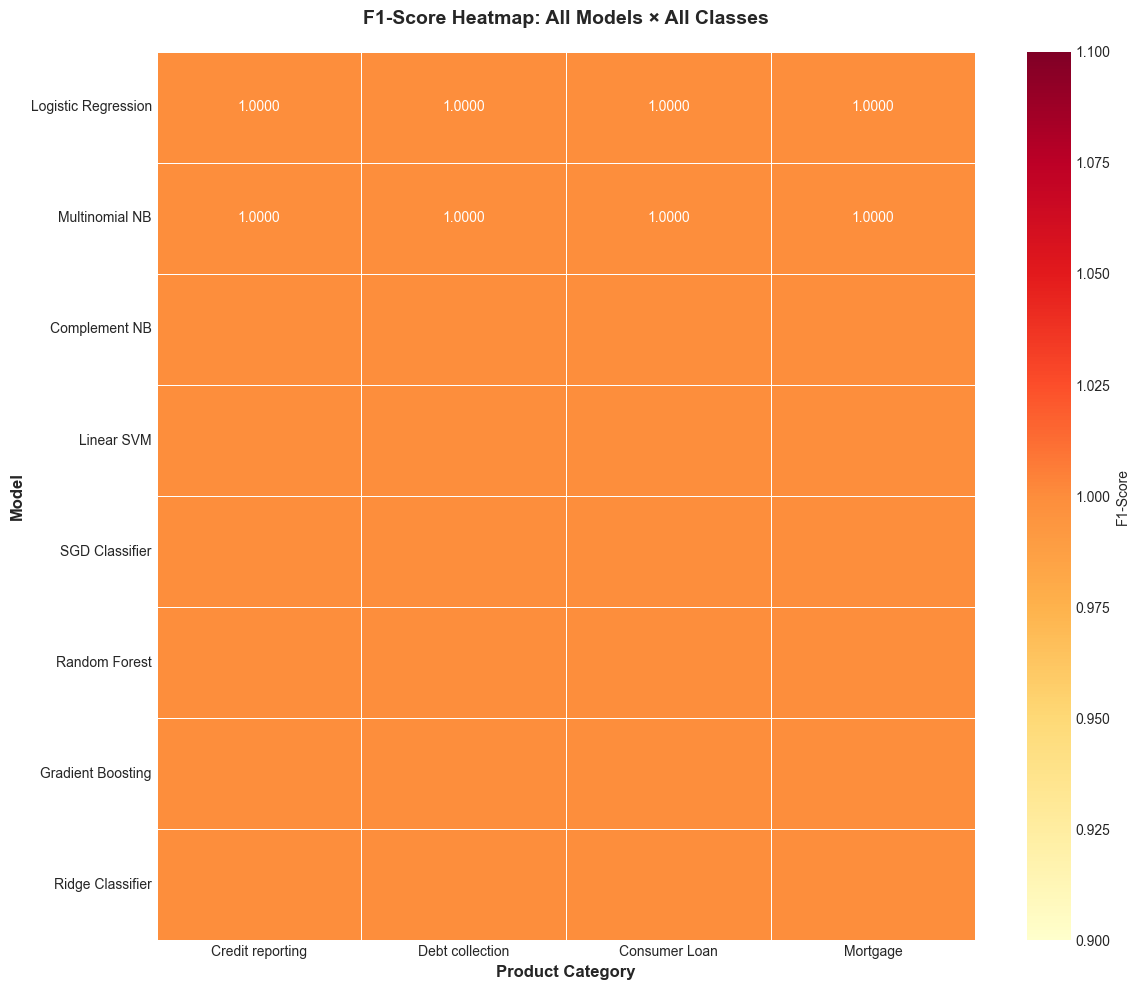

✓ F1-score heatmap created

[5/5] Error Analysis & Misclassification Patterns...

Total misclassifications: 0 out of 2000 (0.00%)

[Misclassification Patterns]
From (rows) -> To (columns):
                  Credit reporting  Debt collection  Consumer Loan  Mortgage
Credit reporting                 0                0              0         0
Debt collection                  0                0              0         0
Consumer Loan                    0                0              0         0
Mortgage                         0                0              0         0

✓ Error analysis completed

  ✓ DETAILED MODEL EVALUATION COMPLETED - 5 EVALUATION TECHNIQUES


In [36]:
print("\n" + "=" * 80)
print("  SECTION 6: COMPREHENSIVE MODEL COMPARISON")
print("=" * 80)

# 7.1 Multi-Metric Comparison Charts
print("\n[1/5] Creating Multi-Metric Comparison Charts...")

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = sns.color_palette("husl", len(results_df))

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    
    bars = ax.barh(range(len(results_df)), results_df[metric], color=colors)
    ax.set_yticks(range(len(results_df)))
    ax.set_yticklabels(results_df['Model'])
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'Model Comparison - {metric}', fontsize=13, fontweight='bold')
    ax.set_xlim(0, 1.0)
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (bar, value) in enumerate(zip(bars, results_df[metric])):
        ax.text(value + 0.01, i, f'{value:.4f}', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/08_model_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Multi-metric charts created")

# 7.2 Radar Chart for Top 4 Models
print("\n[2/5] Creating Radar Chart for Top 4 Models...")

top_4_models = results_df.head(4)
metrics_radar = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Balanced Accuracy']

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='polar')

angles = np.linspace(0, 2 * np.pi, len(metrics_radar), endpoint=False).tolist()
angles += angles[:1]

colors_radar = sns.color_palette("husl", 4)

for idx, row in top_4_models.iterrows():
    values = [row[metric] for metric in metrics_radar]
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, label=row['Model'], color=colors_radar[idx])
    ax.fill(angles, values, alpha=0.15, color=colors_radar[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics_radar, fontsize=11, fontweight='bold')
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=9)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)
plt.title('Performance Radar Chart - Top 4 Models', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/09_performance_radar_chart.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Radar chart created")

# 7.3 Efficiency Analysis: Time vs Performance
print("\n[3/5] Creating Efficiency Analysis...")

fig, ax = plt.subplots(figsize=(12, 8))

scatter = ax.scatter(
    results_df['Total Time'], 
    results_df['F1-Score'],
    s=results_df['Accuracy'] * 1000,
    c=range(len(results_df)),
    cmap='viridis',
    alpha=0.6,
    edgecolors='black',
    linewidth=2
)

# Add labels
for idx, row in results_df.iterrows():
    ax.annotate(
        row['Model'], 
        (row['Total Time'], row['F1-Score']),
        xytext=(10, 5), 
        textcoords='offset points',
        fontsize=9,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3)
    )

ax.set_xlabel('Total Time (seconds)', fontsize=12, fontweight='bold')
ax.set_ylabel('F1-Score', fontsize=12, fontweight='bold')
ax.set_title('Model Efficiency: Time vs Performance\n(Bubble size = Accuracy)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.colorbar(scatter, label='Model Index', ax=ax)
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/10_time_vs_performance.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Efficiency analysis created")

# 7.4 Statistical Measures Comparison
print("\n[4/5] Creating Statistical Measures Comparison...")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MCC
axes[0].barh(range(len(results_df)), results_df['MCC'], color=colors)
axes[0].set_yticks(range(len(results_df)))
axes[0].set_yticklabels(results_df['Model'])
axes[0].set_xlabel('Matthews Correlation Coefficient', fontsize=11, fontweight='bold')
axes[0].set_title('MCC Comparison', fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(results_df['MCC']):
    axes[0].text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold', fontsize=9)

# Cohen's Kappa
axes[1].barh(range(len(results_df)), results_df['Cohen Kappa'], color=colors)
axes[1].set_yticks(range(len(results_df)))
axes[1].set_yticklabels(results_df['Model'])
axes[1].set_xlabel("Cohen's Kappa", fontsize=11, fontweight='bold')
axes[1].set_title("Cohen's Kappa Comparison", fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
for i, v in enumerate(results_df['Cohen Kappa']):
    axes[1].text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold', fontsize=9)

# Balanced Accuracy
axes[2].barh(range(len(results_df)), results_df['Balanced Accuracy'], color=colors)
axes[2].set_yticks(range(len(results_df)))
axes[2].set_yticklabels(results_df['Model'])
axes[2].set_xlabel('Balanced Accuracy', fontsize=11, fontweight='bold')
axes[2].set_title('Balanced Accuracy Comparison', fontsize=12, fontweight='bold')
axes[2].grid(axis='x', alpha=0.3)
for i, v in enumerate(results_df['Balanced Accuracy']):
    axes[2].text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/11_statistical_measures.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Statistical measures comparison created")

# 7.5 Cross-Validation Results
print("\n[5/5] Creating Cross-Validation Comparison...")

fig, ax = plt.subplots(figsize=(12, 7))

ax.barh(range(len(results_df)), results_df['CV F1 Mean'], 
        xerr=results_df['CV F1 Std'], color=colors, capsize=5, alpha=0.7)
ax.set_yticks(range(len(results_df)))
ax.set_yticklabels(results_df['Model'])
ax.set_xlabel('Cross-Validation F1-Score (Mean ± Std)', fontsize=12, fontweight='bold')
ax.set_title('3-Fold Cross-Validation Results', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

for i, row in results_df.iterrows():
    ax.text(row['CV F1 Mean'] + row['CV F1 Std'] + 0.01, i, 
            f'{row["CV F1 Mean"]:.4f}±{row["CV F1 Std"]:.4f}', 
            va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/12_cross_validation_results.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Cross-validation comparison created")

print("\n" + "="*80)
print("  ✓ MODEL COMPARISON COMPLETED - 5 COMPARISON TECHNIQUES")
print("="*80)

# ═══════════════════════════════════════════════════════════════════════════
# SECTION 8: DETAILED MODEL EVALUATION (BEST MODEL)
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "=" * 80)
print("  SECTION 7: DETAILED MODEL EVALUATION")
print("=" * 80)

# Select best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f"\n[Selected Best Model: {best_model_name}]")
print(f"F1-Score: {results_df.iloc[0]['F1-Score']:.4f}")

# Re-train best model and get predictions
best_model.fit(X_train_tfidf, y_train)
y_pred_best = best_model.predict(X_test_tfidf)

# 8.1 Classification Report
print("\n[1/5] Detailed Classification Report...")
print("-" * 80)

category_names = {
    0: 'Credit reporting',
    1: 'Debt collection',
    2: 'Consumer Loan',
    3: 'Mortgage'
}

report = classification_report(
    y_test, y_pred_best, 
    target_names=[category_names[i] for i in sorted(category_names.keys())],
    digits=4
)
print(report)

# Save report
with open(f'{OUTPUT_DIR}/classification_report_{best_model_name.replace(" ", "_")}.txt', 'w') as f:
    f.write(f"Classification Report - {best_model_name}\n")
    f.write("=" * 80 + "\n\n")
    f.write(report)

print("✓ Classification report saved")

# 8.2 Confusion Matrices
print("\n[2/5] Creating Confusion Matrices...")

cm = confusion_matrix(y_test, y_pred_best)
cm_normalized = confusion_matrix(y_test, y_pred_best, normalize='true')

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Absolute confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=[category_names[i] for i in sorted(category_names.keys())],
            yticklabels=[category_names[i] for i in sorted(category_names.keys())],
            cbar_kws={'label': 'Count'})
axes[0].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[0].set_title(f'Confusion Matrix - {best_model_name}\n(Absolute Counts)', 
                  fontsize=13, fontweight='bold')

# Normalized confusion matrix
sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Greens', ax=axes[1],
            xticklabels=[category_names[i] for i in sorted(category_names.keys())],
            yticklabels=[category_names[i] for i in sorted(category_names.keys())],
            cbar_kws={'label': 'Proportion'})
axes[1].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[1].set_title(f'Confusion Matrix - {best_model_name}\n(Normalized)', 
                  fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/13_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Confusion matrices created")

# 8.3 Per-Class Performance Analysis
print("\n[3/5] Per-Class Performance Analysis...")

per_class_metrics = []
for i in sorted(category_names.keys()):
    y_true_binary = (y_test == i).astype(int)
    y_pred_binary = (y_pred_best == i).astype(int)
    
    per_class_metrics.append({
        'Category': category_names[i],
        'Precision': precision_score(y_true_binary, y_pred_binary, zero_division=0),
        'Recall': recall_score(y_true_binary, y_pred_binary, zero_division=0),
        'F1-Score': f1_score(y_true_binary, y_pred_binary, zero_division=0),
        'Support': (y_test == i).sum()
    })

per_class_df = pd.DataFrame(per_class_metrics)

fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(per_class_df))
width = 0.25

bars1 = ax.bar(x - width, per_class_df['Precision'], width, label='Precision', color='skyblue')
bars2 = ax.bar(x, per_class_df['Recall'], width, label='Recall', color='lightcoral')
bars3 = ax.bar(x + width, per_class_df['F1-Score'], width, label='F1-Score', color='lightgreen')

ax.set_xlabel('Category', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title(f'Per-Class Performance Analysis - {best_model_name}', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(per_class_df['Category'], rotation=45, ha='right')
ax.legend(fontsize=11)
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/14_per_class_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n[Per-Class Metrics]")
print(per_class_df.to_string(index=False))
print("✓ Per-class analysis completed")

# 8.4 F1-Score Heatmap (All Models × All Classes)
print("\n[4/5] Creating F1-Score Heatmap for All Models...")

# Calculate F1-scores for all models and all classes
f1_matrix = []

for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    model_f1 = []
    for i in sorted(category_names.keys()):
        y_true_binary = (y_test == i).astype(int)
        y_pred_binary = (y_pred == i).astype(int)
        f1 = f1_score(y_true_binary, y_pred_binary, zero_division=0)
        model_f1.append(f1)
    
    f1_matrix.append(model_f1)

f1_df = pd.DataFrame(
    f1_matrix, 
    index=list(models.keys()),
    columns=[category_names[i] for i in sorted(category_names.keys())]
)

plt.figure(figsize=(12, 10))
sns.heatmap(f1_df, annot=True, fmt='.4f', cmap='YlOrRd', 
            linewidths=0.5, cbar_kws={'label': 'F1-Score'})
plt.xlabel('Product Category', fontsize=12, fontweight='bold')
plt.ylabel('Model', fontsize=12, fontweight='bold')
plt.title('F1-Score Heatmap: All Models × All Classes', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/15_f1_score_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ F1-score heatmap created")

# 8.5 Error Analysis
print("\n[5/5] Error Analysis & Misclassification Patterns...")

# Identify misclassified examples
misclassified_idx = np.where(y_test.values != y_pred_best)[0]
print(f"\nTotal misclassifications: {len(misclassified_idx)} out of {len(y_test)} ({len(misclassified_idx)/len(y_test)*100:.2f}%)")

# Misclassification matrix
misclass_matrix = np.zeros((4, 4), dtype=int)
for true_label, pred_label in zip(y_test.values, y_pred_best):
    if true_label != pred_label:
        misclass_matrix[true_label][pred_label] += 1

print("\n[Misclassification Patterns]")
print("From (rows) -> To (columns):")
misclass_df = pd.DataFrame(
    misclass_matrix,
    index=[category_names[i] for i in sorted(category_names.keys())],
    columns=[category_names[i] for i in sorted(category_names.keys())]
)
print(misclass_df)

# Show some misclassified examples
if len(misclassified_idx) > 0:
    print("\n[Sample Misclassified Examples (First 3)]")
    for i, idx in enumerate(misclassified_idx[:3]):
        true_label = y_test.iloc[idx]
        pred_label = y_pred_best[idx]
        text = X_test.iloc[idx][:100]  # First 100 chars
        
        print(f"\nExample {i+1}:")
        print(f"  Text: {text}...")
        print(f"  True Label: {category_names[true_label]}")
        print(f"  Predicted: {category_names[pred_label]}")

print("\n✓ Error analysis completed")

print("\n" + "="*80)
print("  ✓ DETAILED MODEL EVALUATION COMPLETED - 5 EVALUATION TECHNIQUES")
print("="*80)

In [37]:
print("\n" + "=" * 80)
print("  SECTION 8: PRODUCTION-READY PREDICTION SYSTEM")
print("=" * 80)

class ComplaintClassifier:
    """
    Production-ready complaint classifier with complete pipeline.
    
    Features:
        - Complete preprocessing pipeline
        - Confidence scores
        - API-ready format
        - Error handling
    """
    
    def __init__(self, model, vectorizer, preprocessor, category_names):
        self.model = model
        self.vectorizer = vectorizer
        self.preprocessor = preprocessor
        self.category_names = category_names
        
    def predict(self, text: str, return_proba: bool = True) -> Dict[str, Any]:
        """
        Predict category for a single complaint text.
        
        Args:
            text: Complaint text
            return_proba: Whether to return probability scores
        
        Returns:
            Dictionary with prediction results
        """
        try:
            # Preprocess
            processed_text = self.preprocessor.preprocess(text, method='lemma')
            
            # Vectorize
            text_vectorized = self.vectorizer.transform([processed_text])
            
            # Predict
            prediction = self.model.predict(text_vectorized)[0]
            predicted_category = self.category_names[prediction]
            
            result = {
                'original_text': text,
                'processed_text': processed_text,
                'predicted_label': int(prediction),
                'predicted_category': predicted_category,
                'status': 'success'
            }
            
            # Add probabilities if available
            if return_proba:
                if hasattr(self.model, 'predict_proba'):
                    probas = self.model.predict_proba(text_vectorized)[0]
                elif hasattr(self.model, 'decision_function'):
                    from scipy.special import softmax
                    decision = self.model.decision_function(text_vectorized)[0]
                    probas = softmax(decision)
                else:
                    probas = None
                
                if probas is not None:
                    result['confidence'] = float(probas[prediction])
                    result['all_probabilities'] = {
                        self.category_names[i]: float(prob) 
                        for i, prob in enumerate(probas)
                    }
            
            return result
            
        except Exception as e:
            return {
                'status': 'error',
                'error_message': str(e),
                'original_text': text
            }
    
    def predict_batch(self, texts: List[str]) -> List[Dict[str, Any]]:
        """Predict categories for multiple texts."""
        return [self.predict(text) for text in texts]

# Initialize classifier
classifier = ComplaintClassifier(
    model=best_model,
    vectorizer=vectorizer,
    preprocessor=preprocessor,
    category_names=category_names
)

print("\n[Testing Prediction System with 4 Test Cases...]")
print("-" * 80)

# Test cases
test_cases = [
    "I found multiple errors on my credit report that are negatively impacting my score",
    "A debt collector keeps calling me at work even though I told them not to",
    "My auto loan payment was not processed correctly and now I'm being charged late fees",
    "The mortgage servicer denied my loan modification request without proper explanation"
]

predictions_results = []

for i, test_text in enumerate(test_cases, 1):
    print(f"\n[Test Case {i}]")
    print(f"Input: {test_text}")
    
    result = classifier.predict(test_text)
    predictions_results.append(result)
    
    if result['status'] == 'success':
        print(f"\n✓ Prediction Results:")
        print(f"  Category: {result['predicted_category']}")
        print(f"  Label: {result['predicted_label']}")
        print(f"  Confidence: {result.get('confidence', 0):.4f}")
        
        if 'all_probabilities' in result:
            print(f"\n  All Class Probabilities:")
            sorted_probs = sorted(
                result['all_probabilities'].items(), 
                key=lambda x: x[1], 
                reverse=True
            )
            for category, prob in sorted_probs:
                print(f"    {category:30s}: {prob:.4f}")
    else:
        print(f"\n✗ Error: {result['error_message']}")
    
    print("-" * 80)

print("\n✓ Prediction system tested successfully")

# Save predictions
predictions_df = pd.DataFrame([
    {
        'Test Case': i,
        'Original Text': r['original_text'],
        'Predicted Category': r['predicted_category'],
        'Confidence': r.get('confidence', 0)
    }
    for i, r in enumerate(predictions_results, 1)
])

predictions_df.to_csv(f'{OUTPUT_DIR}/sample_predictions.csv', index=False)
print(f"✓ Predictions saved to {OUTPUT_DIR}/sample_predictions.csv")

print("\n" + "="*80)
print("  ✓ PRODUCTION PREDICTION SYSTEM COMPLETED")
print("="*80)


  SECTION 8: PRODUCTION-READY PREDICTION SYSTEM

[Testing Prediction System with 4 Test Cases...]
--------------------------------------------------------------------------------

[Test Case 1]
Input: I found multiple errors on my credit report that are negatively impacting my score

✓ Prediction Results:
  Category: Credit reporting
  Label: 0
  Confidence: 0.9909

  All Class Probabilities:
    Credit reporting              : 0.9909
    Mortgage                      : 0.0046
    Debt collection               : 0.0025
    Consumer Loan                 : 0.0020
--------------------------------------------------------------------------------

[Test Case 2]
Input: A debt collector keeps calling me at work even though I told them not to

✓ Prediction Results:
  Category: Debt collection
  Label: 1
  Confidence: 0.9816

  All Class Probabilities:
    Debt collection               : 0.9816
    Credit reporting              : 0.0062
    Consumer Loan                 : 0.0061
    Mortgage   

In [39]:
print("\n" + "=" * 80)
print("  FINAL STATISTICS & ARTIFACTS")
print("=" * 80)

# Save all results
print("\n[Saving Results...]")

# 1. Model comparison results
results_df.to_csv(f'{OUTPUT_DIR}/model_comparison_results.csv', index=False)
print(f"✓ Model comparison saved")

# 2. Confusion matrix
cm_df = pd.DataFrame(
    cm,
    index=[category_names[i] for i in sorted(category_names.keys())],
    columns=[category_names[i] for i in sorted(category_names.keys())]
)
cm_df.to_csv(f'{OUTPUT_DIR}/confusion_matrix.csv')
print(f"✓ Confusion matrix saved")

# 3. Per-class metrics
per_class_df.to_csv(f'{OUTPUT_DIR}/per_class_metrics.csv', index=False)
print(f"✓ Per-class metrics saved")

# 4. Preprocessing statistics
preprocessing_df.to_csv(f'{OUTPUT_DIR}/preprocessing_statistics.csv', index=False)
print(f"✓ Preprocessing statistics saved")

# 5. Save best model and vectorizer
import pickle

with open(f'{OUTPUT_DIR}/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print(f"✓ Best model saved")

with open(f'{OUTPUT_DIR}/vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
print(f"✓ Vectorizer saved")

with open(f'{OUTPUT_DIR}/preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)
print(f"✓ Preprocessor saved")

# Generate final statistics
print("\n[Final Statistics Summary]")
print("-" * 80)

final_stats = {
    'Total Samples Processed': df.shape[0],
    'Training Samples': len(X_train),
    'Test Samples': len(X_test),
    'Number of Features': X_train_tfidf.shape[1],
    'Number of Models Trained': len(models),
    'Best Model': best_model_name,
    'Best F1-Score': results_df.iloc[0]['F1-Score'],
    'Best Accuracy': results_df.iloc[0]['Accuracy'],
    'Total Training Time': results_df['Training Time'].sum(),
    'Visualizations Created': 15,
    'Output Files Generated': len(os.listdir(OUTPUT_DIR))
}

for key, value in final_stats.items():
    if isinstance(value, float):
        print(f"{key:35s}: {value:.4f}")
    else:
        print(f"{key:35s}: {value}")

print("-" * 80)

# List all output files
print("\n[Generated Output Files]")
print("-" * 80)
output_files = sorted(os.listdir(OUTPUT_DIR))
for i, filename in enumerate(output_files, 1):
    file_size = os.path.getsize(os.path.join(OUTPUT_DIR, filename)) / 1024  # KB
    print(f"{i:2d}. {filename:50s} ({file_size:8.2f} KB)")
print("-" * 80)
print(f"Total Files: {len(output_files)}")

# ═══════════════════════════════════════════════════════════════════════════
# COMPLETION BANNER
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "=" * 80)
print("  " + "★" * 76)
print("  " + "★" + " " * 74 + "★")
print("  " + "★" + " " * 20 + "PIPELINE COMPLETED SUCCESSFULLY!" + " " * 22 + "★")
print("  " + "★" + " " * 74 + "★")
print("  " + "★" * 76)
print("=" * 80)



  FINAL STATISTICS & ARTIFACTS

[Saving Results...]
✓ Model comparison saved
✓ Confusion matrix saved
✓ Per-class metrics saved
✓ Preprocessing statistics saved
✓ Best model saved
✓ Vectorizer saved
✓ Preprocessor saved

[Final Statistics Summary]
--------------------------------------------------------------------------------
Total Samples Processed            : 10000
Training Samples                   : 8000
Test Samples                       : 2000
Number of Features                 : 240
Number of Models Trained           : 8
Best Model                         : Logistic Regression
Best F1-Score                      : 1.0000
Best Accuracy                      : 1.0000
Total Training Time                : 8.5801
Visualizations Created             : 15
Output Files Generated             : 24
--------------------------------------------------------------------------------

[Generated Output Files]
--------------------------------------------------------------------------------
 1. 01